# Use spectra of CTIO Data in June 2017 to do atmospheric studies
==================================================================================================
## Look at equivalent width

- author : Sylvie Dagoret-Campagne
- affliliation : LAL/IN2P3/CNRS
- creation date   : July 5th 2017
- Big Update : October 22th 2017

This notebook is supposed to perform an atmospheric properties measurement on spectra

In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaEqWdtCalibSpectrum
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_08jun17/HD205905


In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [5]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
from scipy.interpolate import interp1d

In [7]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Selection Flag

In [8]:
ShowInputSpectra=False

## Input Files

In [9]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
date="20170608"
object_name='HD205905'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output files

In [10]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_eqw"
ensure_dir(outputdir)

In [11]:
output_file='AnaEqWdtFromSpectra_'+object_name+'.csv'

# Read Input files

In [12]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [13]:
sorted_files[0:5]

array(['./simandcalibspec/calibandSimSpectra_20170608_155.fits',
       './simandcalibspec/calibandSimSpectra_20170608_159.fits',
       './simandcalibspec/calibandSimSpectra_20170608_160.fits',
       './simandcalibspec/calibandSimSpectra_20170608_161.fits',
       './simandcalibspec/calibandSimSpectra_20170608_162.fits'], 
      dtype='|S54')

In [14]:
all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

In [15]:
NDATA=len(all_rightspectra_data)
all_dt= [ parser.parse(all_dates[i]) for i in range(NDATA)]

## Clean Spectra

In [16]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [17]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut
all_leftspectra_wl,all_leftspectra_data=all_leftspectra_wl_cut,all_leftspectra_data_cut
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

In [18]:
all_rightspectra_sim=all_sim_spectra_data
all_rightspectra_sim_wl=all_sim_spectra_wl

# Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


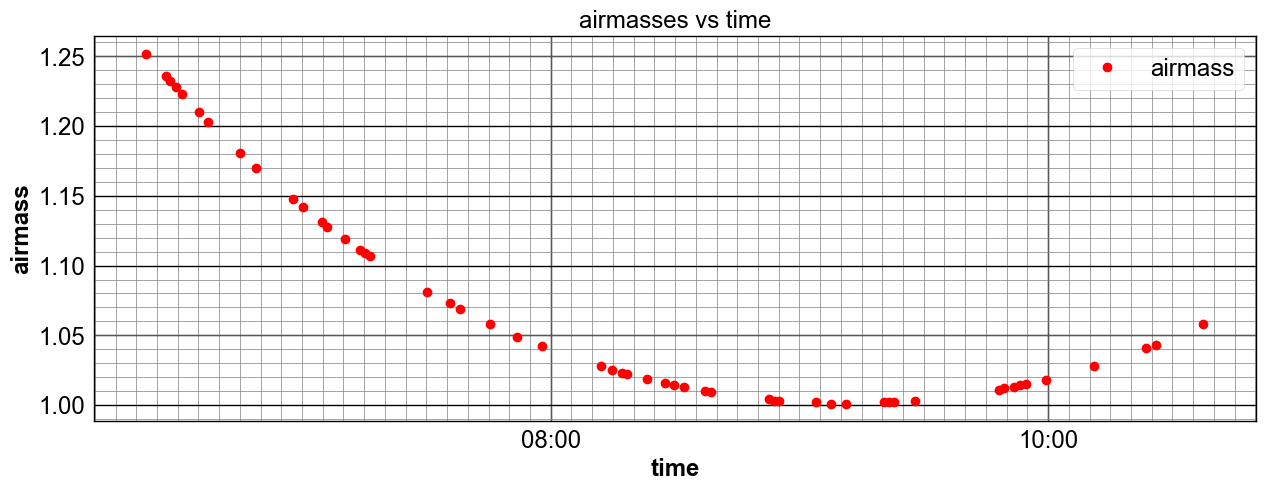

In [19]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

# Sort Dispersers

In [20]:
print all_filt

['RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 Ron200', 'RG715 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhP', 'FGB37 HoloPhAg', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloAmAg', 'RG715 Ron200', 'RG715 HoloPhAg', 'FGB37 Thor300', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'FGB37 Ron200', 'FGB37 Thor300', 'RG715 Thor300', 'RG715 HoloPhAg', 'FGB37 Ron200', 'FGB37 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'FGB37 Ron200', 'RG715 Ron200', 'FGB37 Thor300', 'RG715 HoloAmAg', 'FGB37 Thor300', 'RG715 HoloPhP', 'FGB37 Thor300', 'RG715 Thor300', 'FGB37 HoloPhP', 'FGB37 HoloAmAg', 'FGB37 HoloPhP', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'FGB37 HoloAmAg', 'RG715 HoloAmAg', 'RG715 Thor300', 'FGB37 Thor300', 'FGB37 Thor300', 'FGB37 HoloPhP', 'RG715 Thor300']


In [21]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [22]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 6  8 14 15 21 25 26 29 35 37 39 40 48 49 50 52]
dia HoloPhP  	 : filt2_idx ::  [ 1 11 16 17 30 38 41 43 44 51]
dia HoloPhAg  	 : filt3_idx ::  [ 2  3 12 20 22 27 45]
dia HoloAmAg  	 : filt4_idx ::  [ 4  7  9 13 18 23 31 32 36 42 46 47]
dia Ron200  	 : filt5_idx ::  [ 0  5 10 19 24 28 33 34]
Unknown  	 : filt6_idx ::  []


In [23]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

In [24]:
all_filt1=np.array(all_filt1)
all_filt2=np.array(all_filt2)

In [25]:
def FindIndexWithFilt(all_filt,in_index,tagfilt):
    all_filt_indisp=all_filt[in_index]
    sel_idx=np.where(all_filt_indisp==tagfilt)
    out_index=in_index[sel_idx]
    return out_index

In [26]:
all_filt1_Thor300=all_filt1[Thor300_index]
#all_filt1_Ron400=all_filt1[Ron400_index]
all_filt1_HoloPhP=all_filt1[HoloPhP_index]
all_filt1_HoloPhAg=all_filt1[HoloPhAg_index]
all_filt1_HoloAmAg=all_filt1[HoloAmAg_index]
#all_filt1_Ron200=all_filt1[Ron200_index]

In [27]:
Thor300_index2=FindIndexWithFilt(all_filt1,Thor300_index,'RG715')
#Ron400_index2=FindIndexWithFilt(all_filt1,Ron400_index,'RG715')
HoloPhP_index2=FindIndexWithFilt(all_filt1,HoloPhP_index,'RG715')
HoloPhAg_index2=FindIndexWithFilt(all_filt1,HoloPhAg_index,'RG715')
HoloAmAg_index2=FindIndexWithFilt(all_filt1,HoloAmAg_index,'RG715')
#Ron200_index2=FindIndexWithFilt(all_filt1,Ron200_index,'FGB37')

# Remove blue filter

In [28]:
if 1:
    all_dt_new=[]
    all_airmass_new=[]
    all_filt_new=[]
    all_sim_spectra_wl_new=[]
    all_sim_spectra_data_new=[]
    all_rightspectra_wl_new=[]
    all_rightspectra_data_new=[]
    all_leftspectra_wl_new=[]
    all_leftspectra_data_new=[]
    all_totleftspectra_data_new=[]
    all_totrightspectra_data_new=[]
    all_rightspectra_data_stat_err_new=[]
    all_leftspectra_data_stat_err_new=[]

In [29]:
if 1:
    for idx in np.arange(NDATA):
        if re.search('RG715',all_filt[idx]) or re.search('dia',all_filt[idx]):
            all_filt_new.append(all_filt[idx])
            all_dt_new.append(all_dt[idx])
            all_airmass_new.append(all_airmass[idx])
            all_sim_spectra_wl_new.append(all_sim_spectra_wl[idx])
            all_sim_spectra_data_new.append(all_sim_spectra_data[idx])
            all_rightspectra_wl_new.append(all_rightspectra_wl[idx])
            all_rightspectra_data_new.append(all_rightspectra_data[idx])
            all_leftspectra_wl_new.append(all_leftspectra_wl[idx])
            all_leftspectra_data_new.append(all_leftspectra_data[idx])
            all_totleftspectra_data_new.append(all_totleftspectra_data[idx])
            all_totrightspectra_data_new.append(all_totrightspectra_data[idx])
            all_rightspectra_data_stat_err_new.append(all_rightspectra_data_stat_err[idx])
            all_leftspectra_data_stat_err_new.append(all_leftspectra_data_stat_err[idx])

In [30]:
if 1:
    all_filt=all_filt_new
    all_dt=all_dt_new
    all_airmass=all_airmass_new
    all_sim_spectra_wl=all_sim_spectra_wl_new
    all_sim_spectra_data=all_sim_spectra_data_new
    all_rightspectra_wl=all_rightspectra_wl_new
    all_rightspectra_data=all_rightspectra_data_new
    all_leftspectra_wl=all_leftspectra_wl_new
    all_leftspectra_data=all_leftspectra_data_new
    all_totleftspectra_data=all_totleftspectra_data_new
    all_totrightspectra_data=all_totrightspectra_data_new
    all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_new
    all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_new

# Show Spectra

In [31]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

# Measurement of Equivalent Width
==============================================

## Function to select any spectrum

In [32]:
def SelectTheSpectrum(sel):
    thewl=all_rightspectra_wl[sel]
    thespectrum=all_rightspectra_data[sel]
    thesimwl=all_rightspectra_sim_wl[sel]
    thesimspectrum=all_rightspectra_sim[sel]
    thelabel=all_filt[sel]
    thespecstaterr=all_rightspectra_data_stat_err[sel]    
    return thewl,thespectrum,thespecstaterr,thesimwl,thesimspectrum,thelabel

## Select the spectrum under study

In [33]:
sel=2 # spectrum number

In [34]:
thewl,thespectrum,thespecstaterr,thesimwl,thesimspectrum,thelabel=SelectTheSpectrum(sel)
thelabel_data=thelabel+' (DATA)'
thelabel_sim=thelabel+' (SIM)'

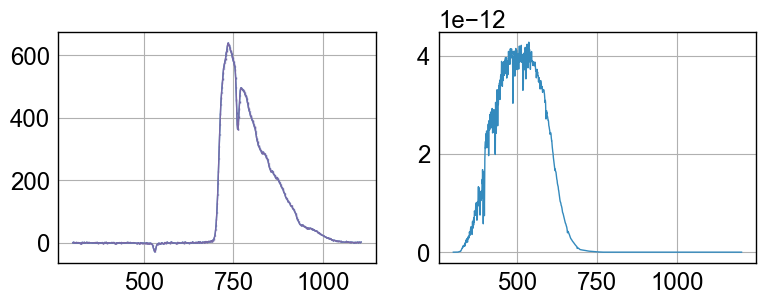

In [35]:
f, axarr = plt.subplots(1,2,figsize=(9,3))
axarr[0].plot(thewl,thespectrum)
axarr[0].errorbar(thewl,thespectrum,yerr=thespecstaterr)
axarr[1].plot(thesimwl,thesimspectrum)

## $O_2$ absorption line

### Selection of spectrum test

In [36]:
sel=0
thewl,thespectrum,thespecstaterr,thesimwl,thesimspectrum,thelabel=SelectTheSpectrum(sel)
thelabel_data=thelabel+' $O_2$ line (DATA)'
thelabel_sim=thelabel+' $O_2$ line (SIM)'

### Selection of order for fit

In [37]:
n_order_fit=1

In [38]:
n_order_fit_o2_data=1
n_order_fit_o2_sim=2

### Individual $O_2$ absorption line

In [39]:
#O2WL1=740
#O2WL2=750
#O2WL3=780
#O2WL4=790

O2WL1=737
O2WL2=745
O2WL3=780
O2WL4=790

#### Linear Fit of Background in DATA 

 EQW_DATA =  2.71417


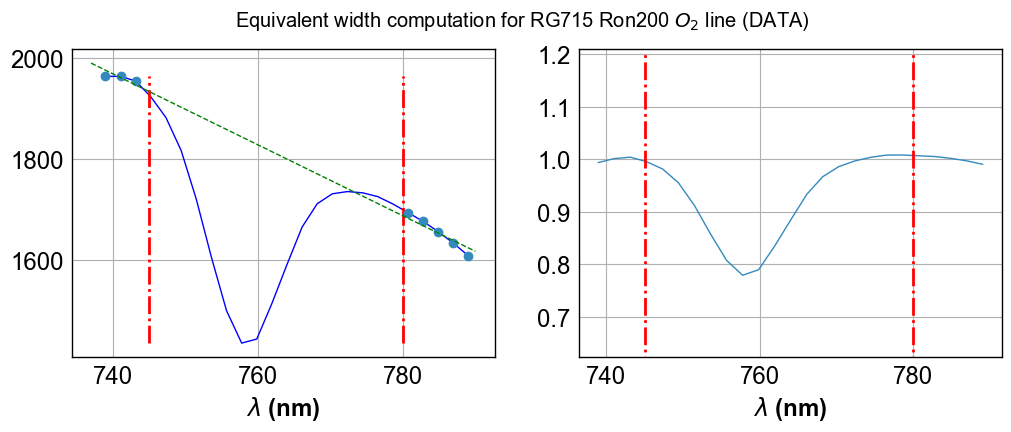

In [40]:
EQW_DATA = ShowEquivalentWidth2(thewl,thespectrum,O2WL1,O2WL2,O2WL3,O2WL4,label=thelabel_data)
print ' EQW_DATA = ',EQW_DATA

#### Linear Fit of Background in SIM

 EQW_SIM =  2.28812


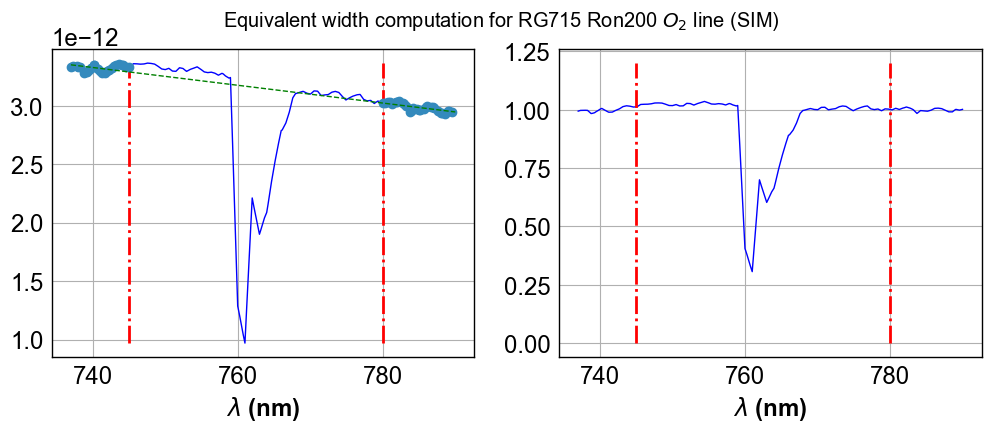

In [41]:
EQW_SIM = ShowEquivalentWidth(thesimwl,thesimspectrum,O2WL1,O2WL2,O2WL3,O2WL4,label=thelabel_sim)
print ' EQW_SIM = ',EQW_SIM

#### Non linear fit of Background in Data

 EQW_DATA =  2.71417


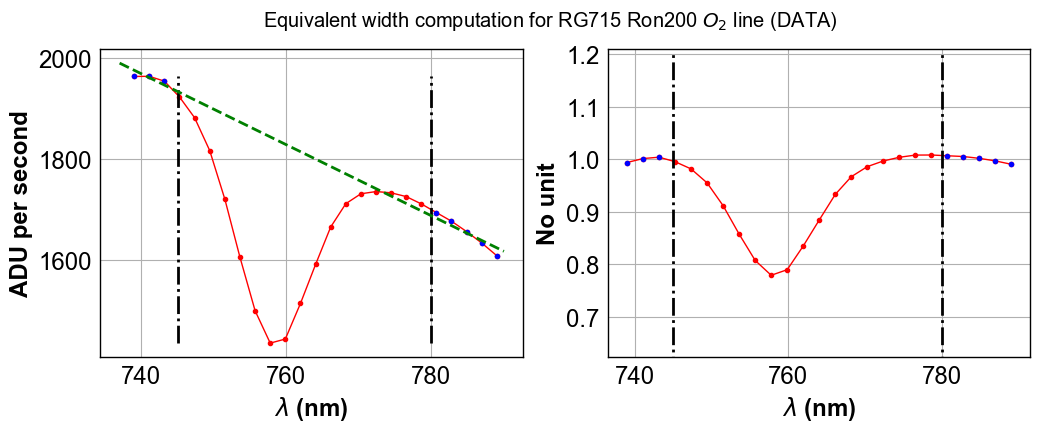

In [42]:
EQW_DATA = ShowEquivalentWidthNonLinear(thewl,thespectrum,O2WL1,O2WL2,O2WL3,O2WL4,ndeg=n_order_fit_o2_data,label=thelabel_data)
print ' EQW_DATA = ',EQW_DATA

#### Non linear fit of Background with Statistical errors in Data

 EQW_DATA =  2.71407  +/-  0.141678823331  nm


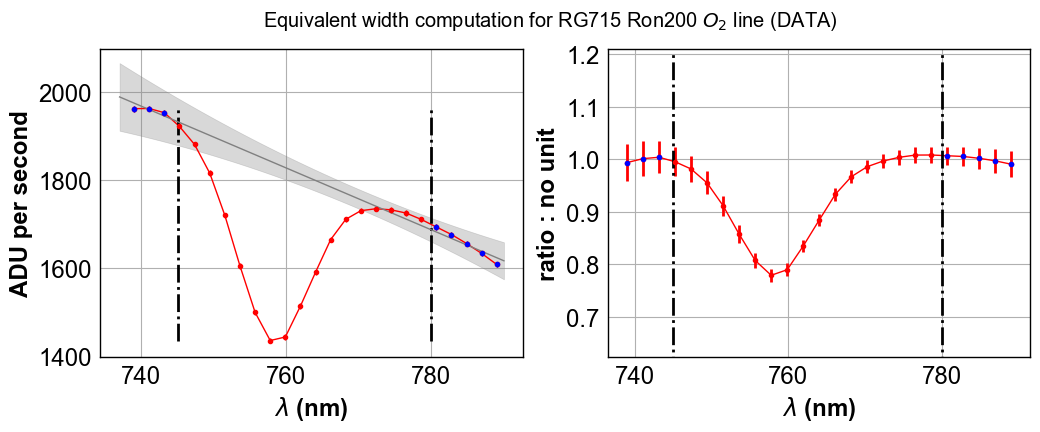

In [43]:
EQW_DATA, EQW_DATA_ERR= ShowEquivalentWidthNonLinearwthStatErr(thewl,thespectrum,thespecstaterr,O2WL1,O2WL2,O2WL3,O2WL4,ndeg=n_order_fit_o2_data,label=thelabel_data)
print ' EQW_DATA = ',EQW_DATA,' +/- ', EQW_DATA_ERR,' nm'

#### Non linear fit of Background in Simulation

EQW_SIM =  2.70218  nm


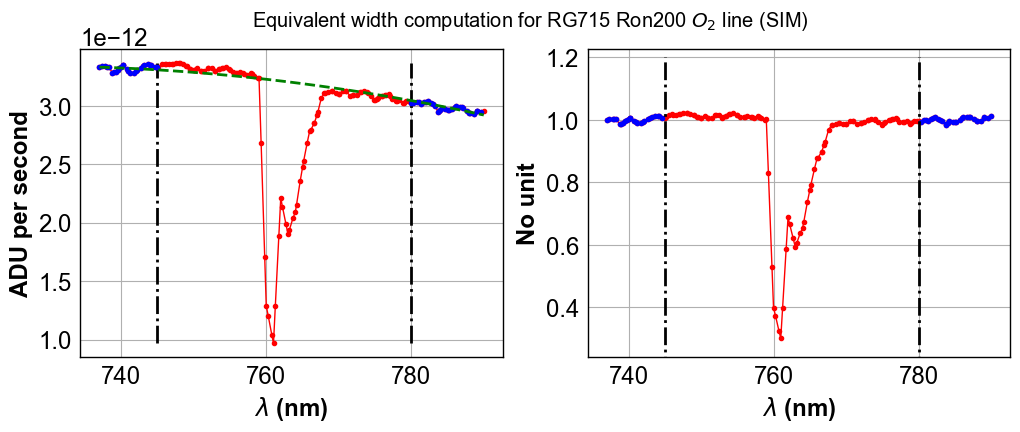

In [44]:
EQW_SIM = ShowEquivalentWidthNonLinear(thesimwl,thesimspectrum,O2WL1,O2WL2,O2WL3,O2WL4,ndeg=n_order_fit_o2_sim,label=thelabel_sim)
print 'EQW_SIM = ', EQW_SIM, ' nm'

### Show All $O_2$ absorption lines 
-------------------------------

In [45]:
WL1_O2_DATA=O2WL1
WL2_O2_DATA=O2WL2
WL3_O2_DATA=O2WL3
WL4_O2_DATA=O2WL4

In [46]:
WL1_O2_SIM=O2WL1
WL2_O2_SIM=O2WL2
WL3_O2_SIM=O2WL3
WL4_O2_SIM=O2WL4

#### Show Linear Fit of Background in DATA 

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


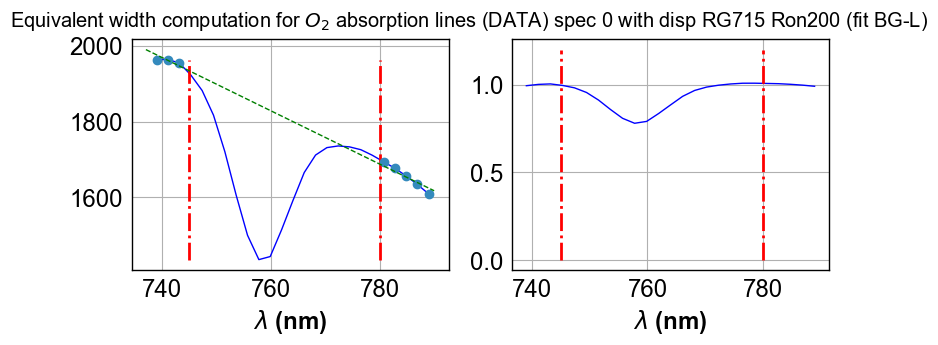

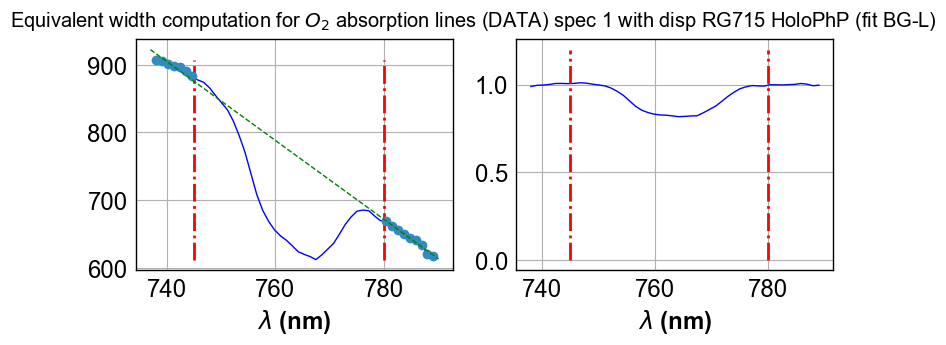

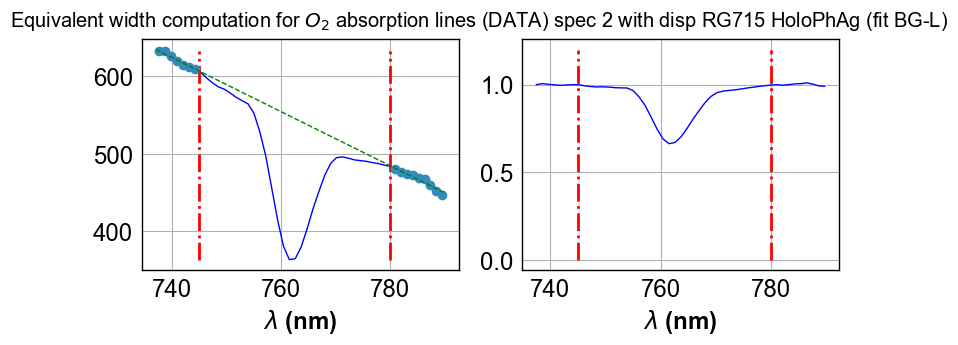

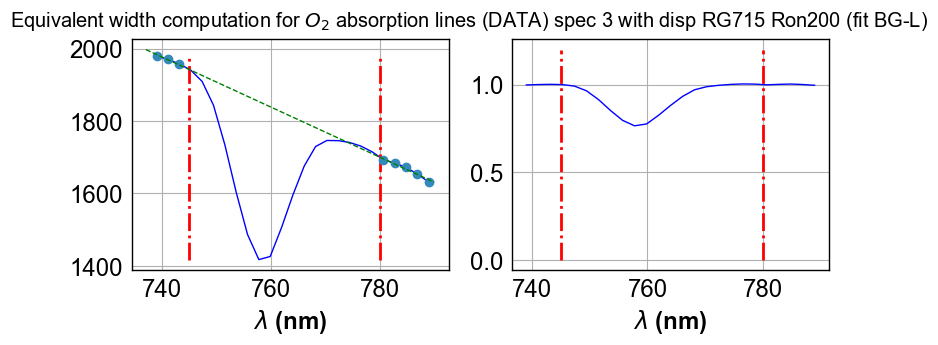

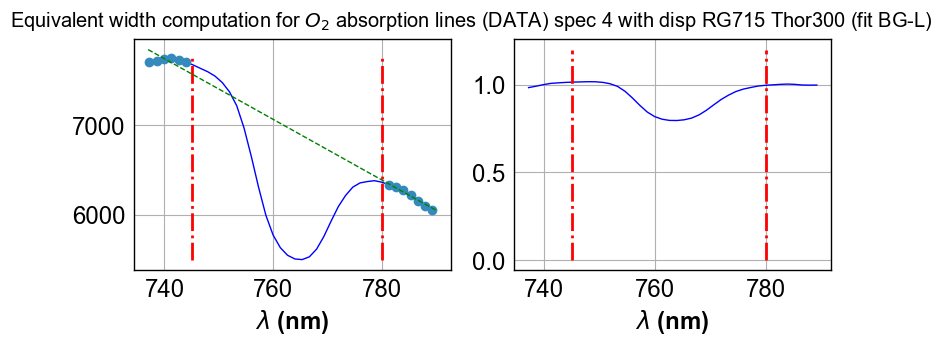

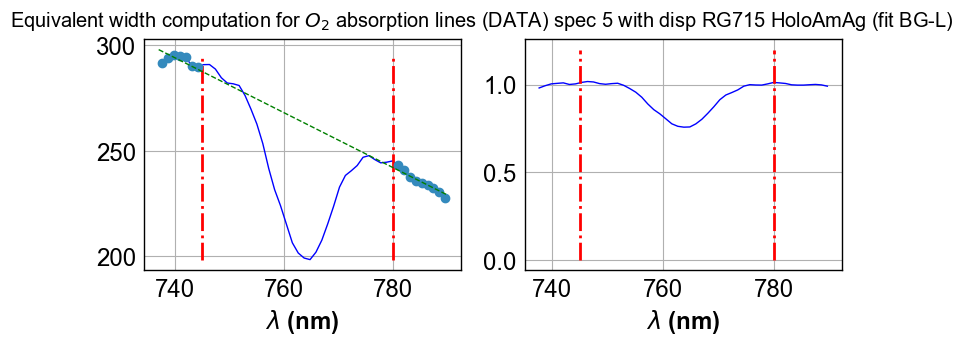

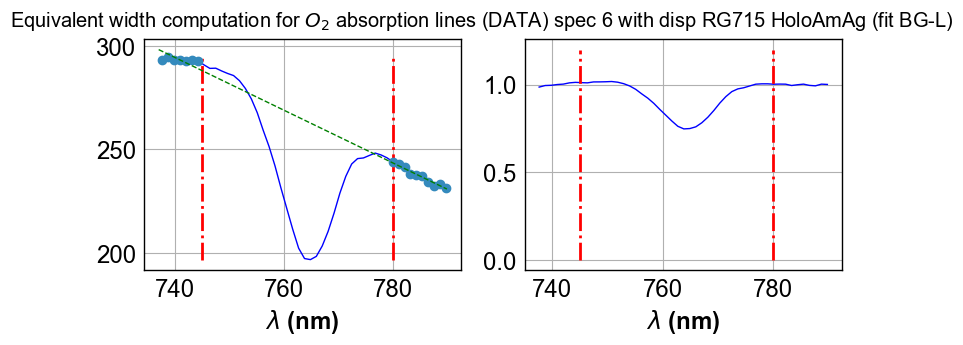

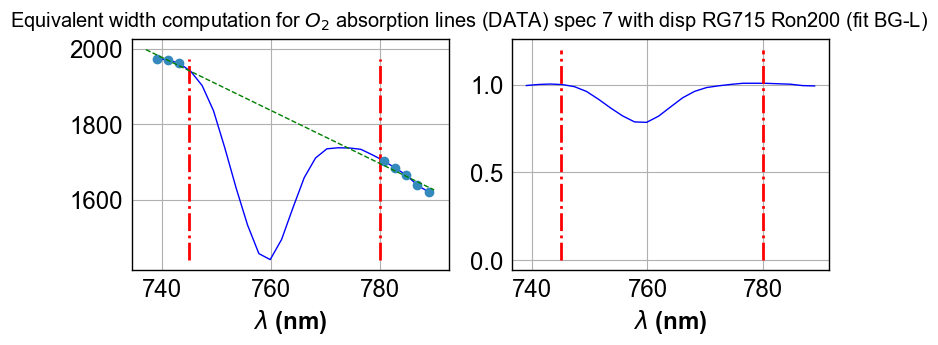

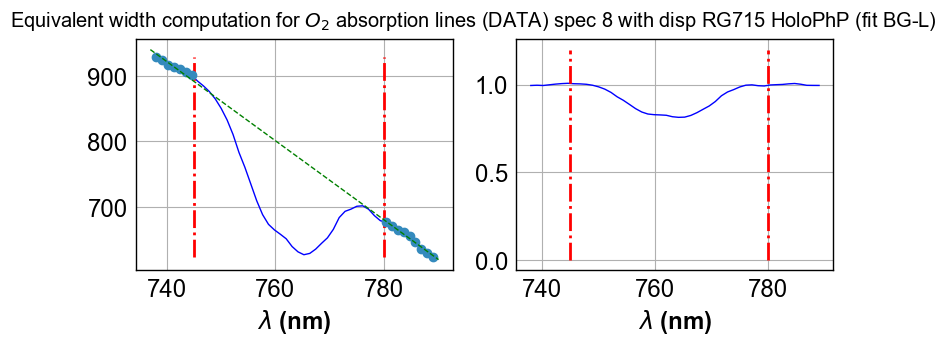

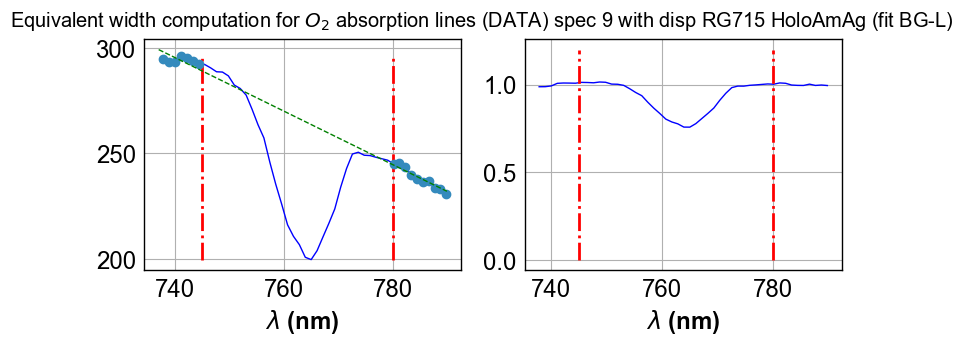

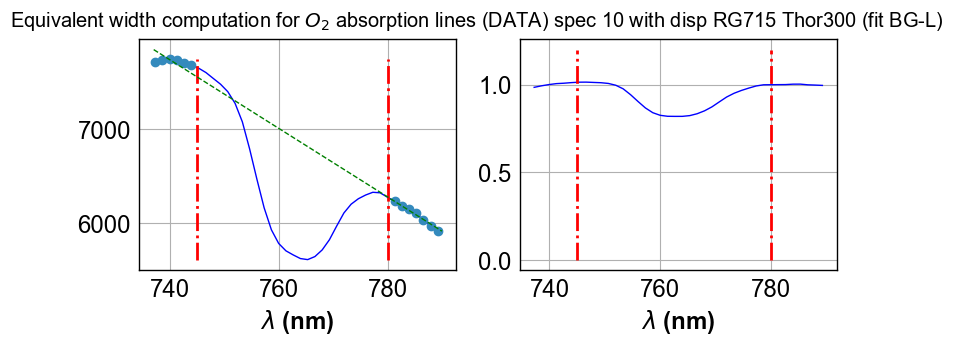

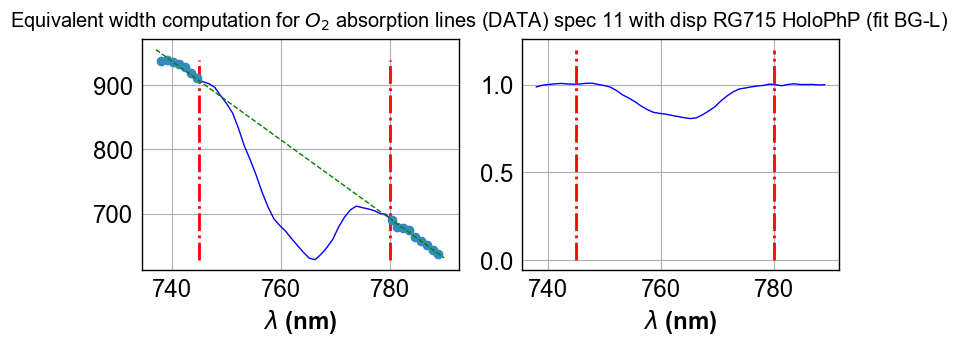

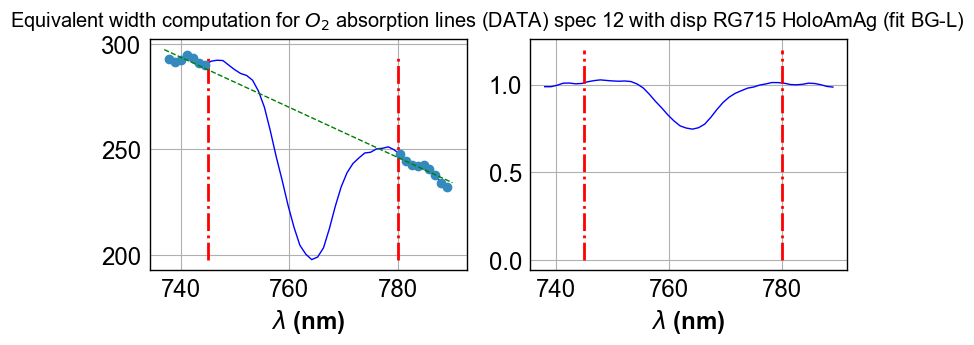

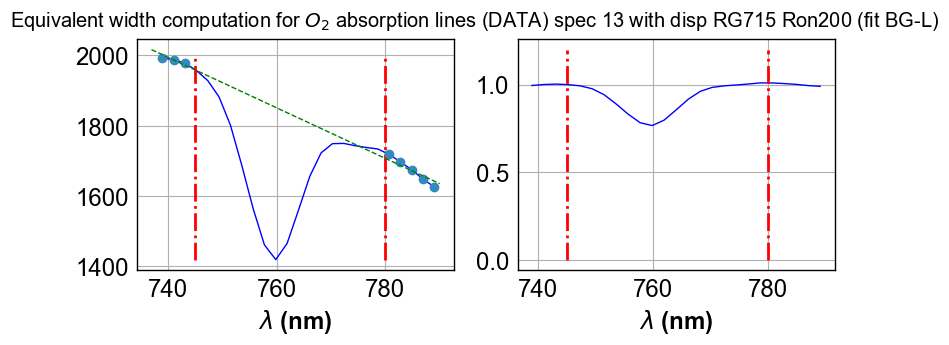

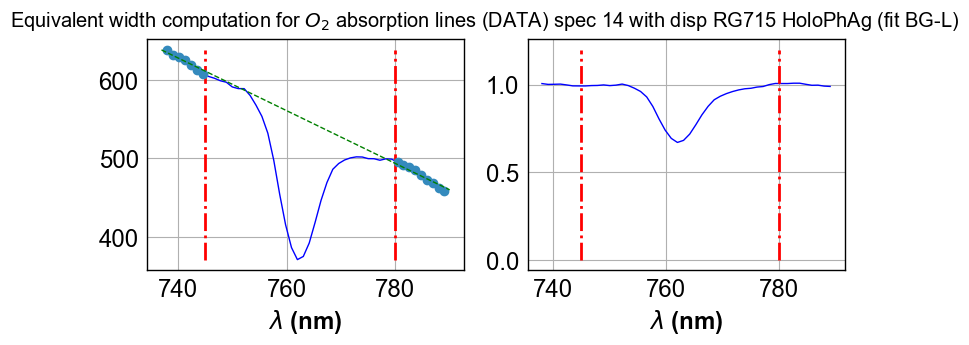

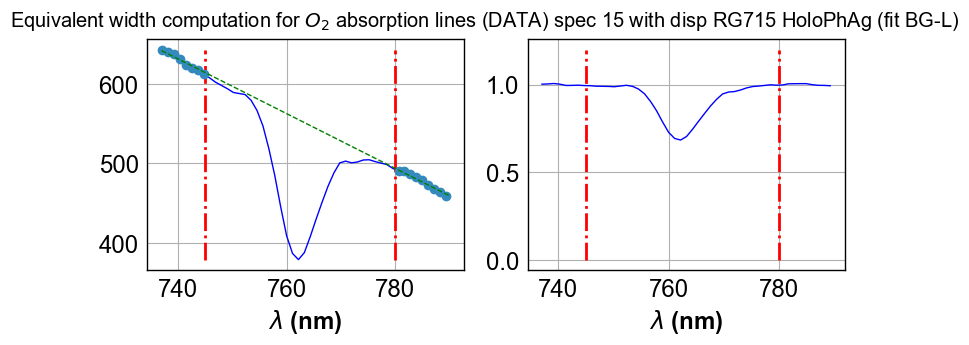

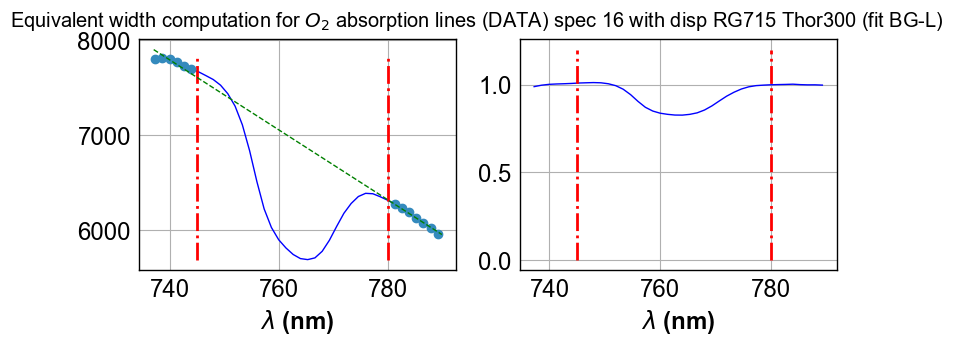

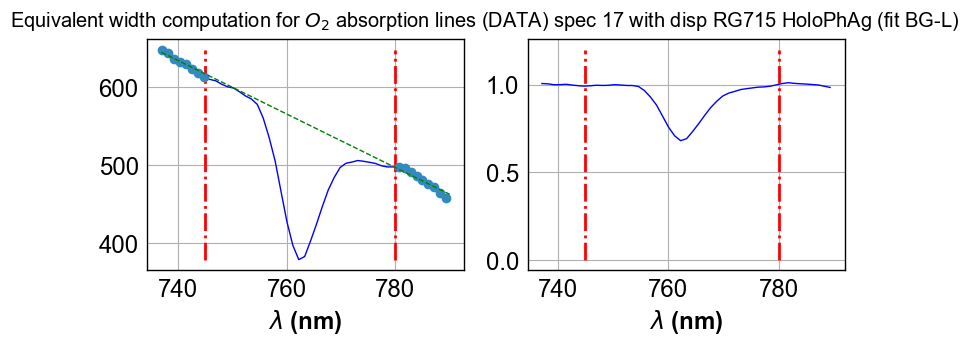

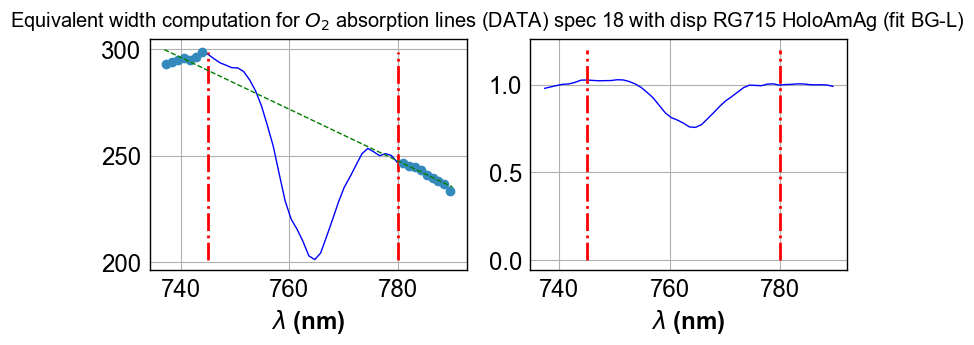

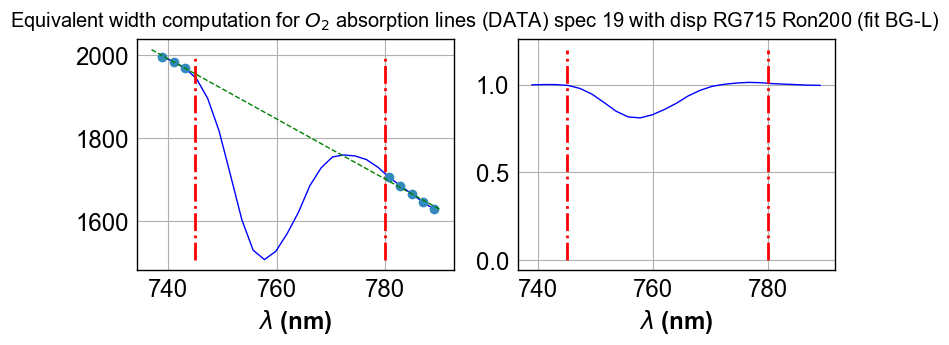

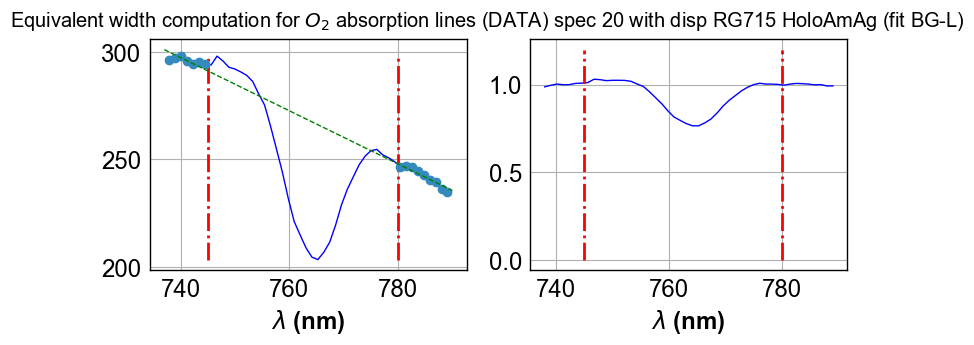

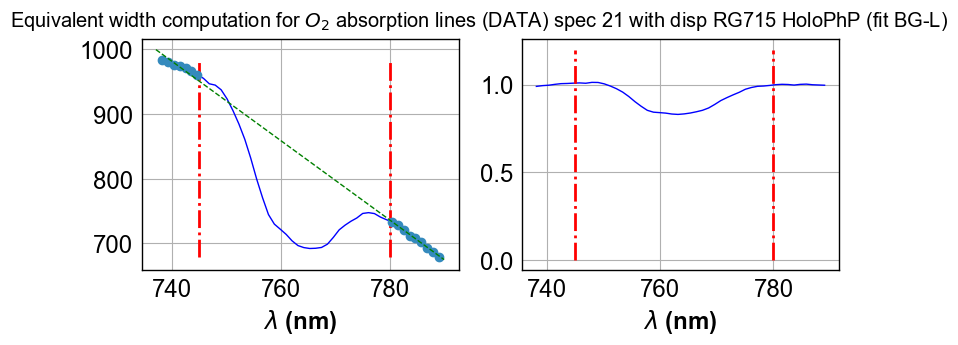

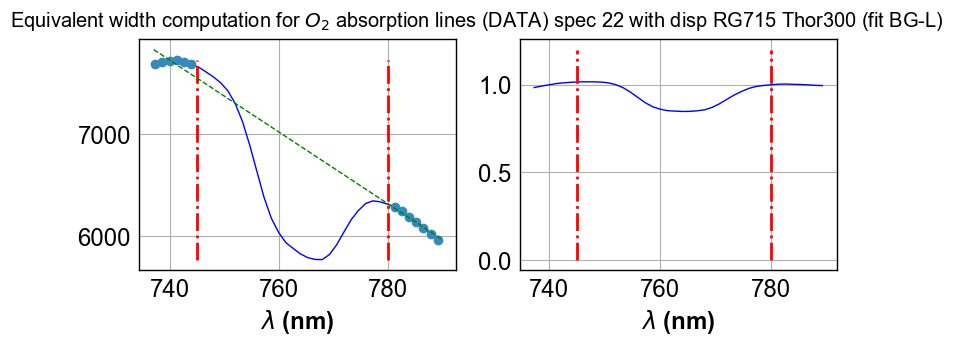

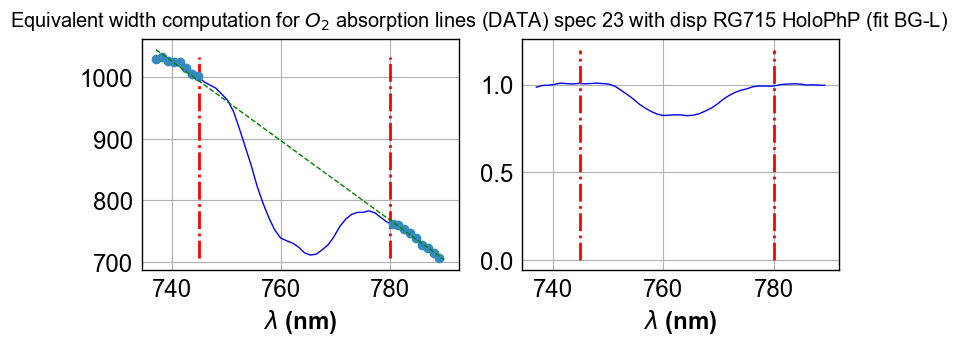

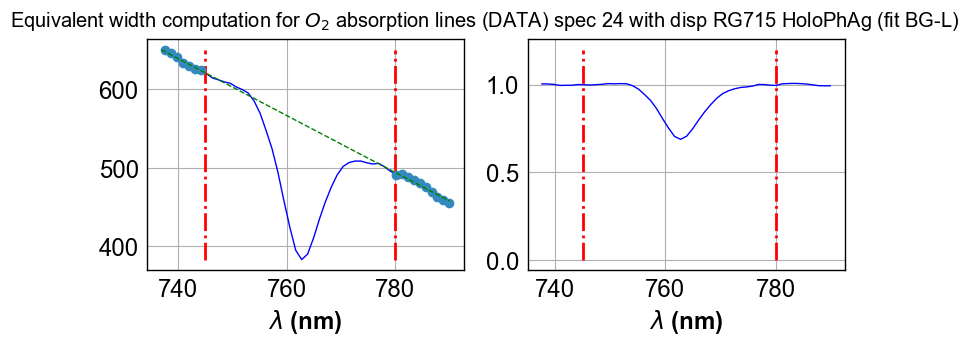

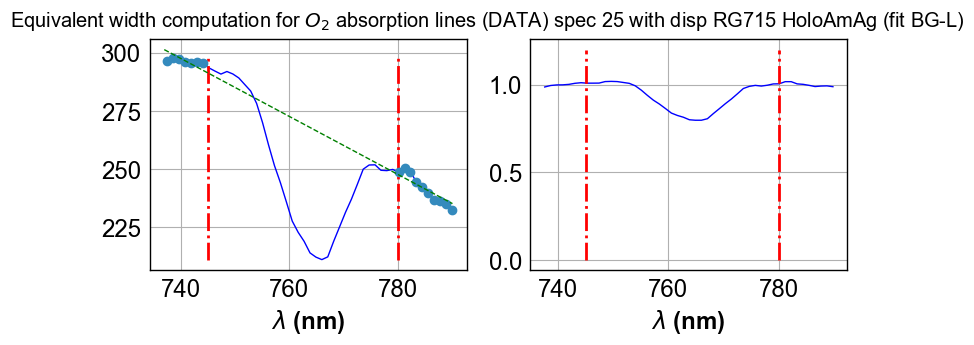

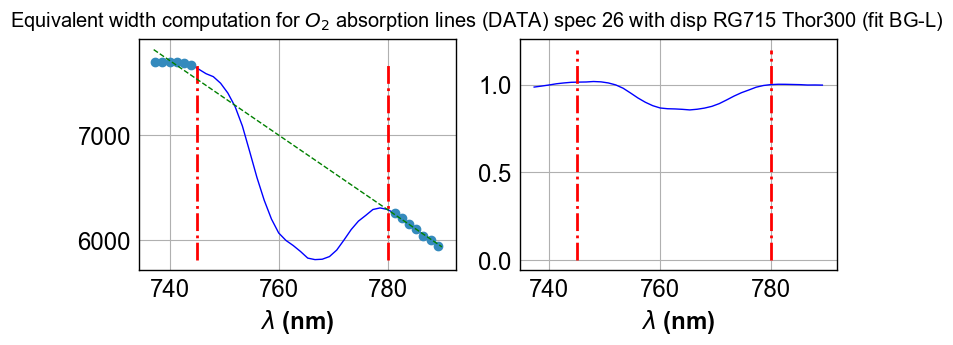

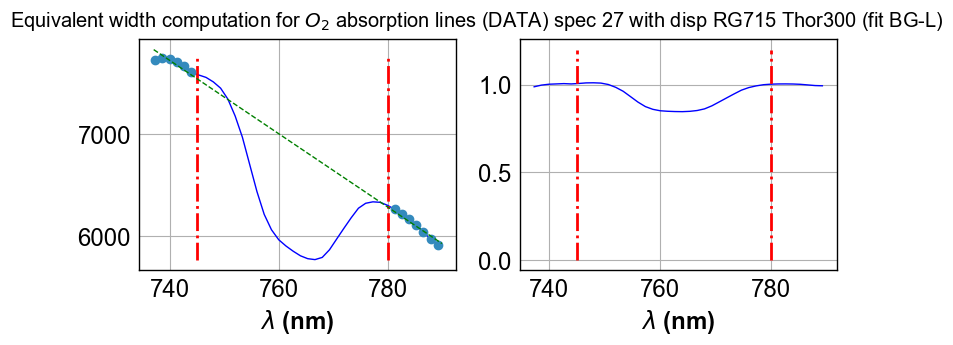

In [47]:
ShowAllEquivalentWidth(all_rightspectra_wl,all_rightspectra_data,all_filt,WL1_O2_DATA,WL2_O2_DATA,WL3_O2_DATA,WL4_O2_DATA,label='$O_2$ absorption lines (DATA)')

#### Show Non  Linear Fit of Background in DATA 

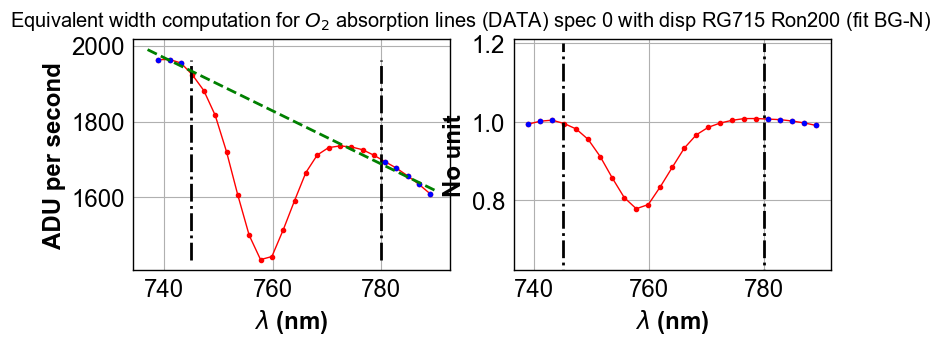

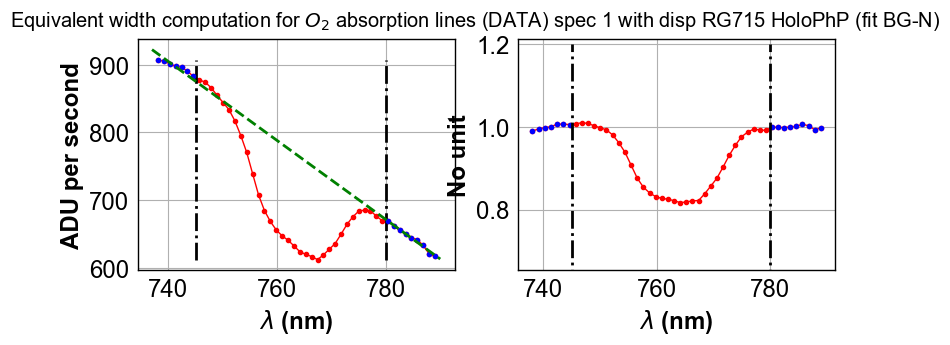

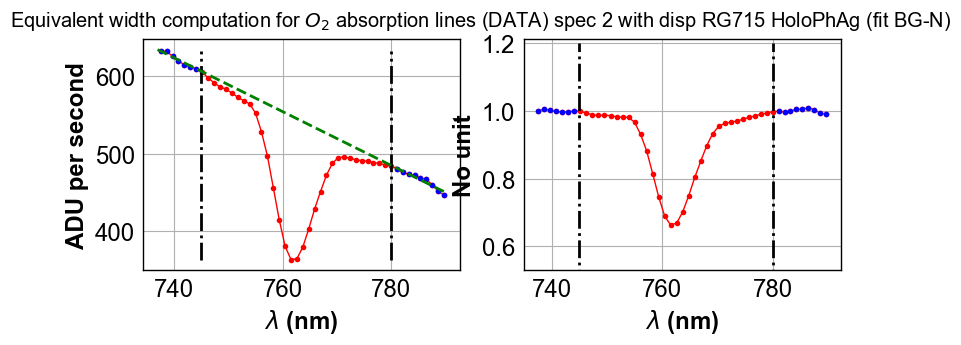

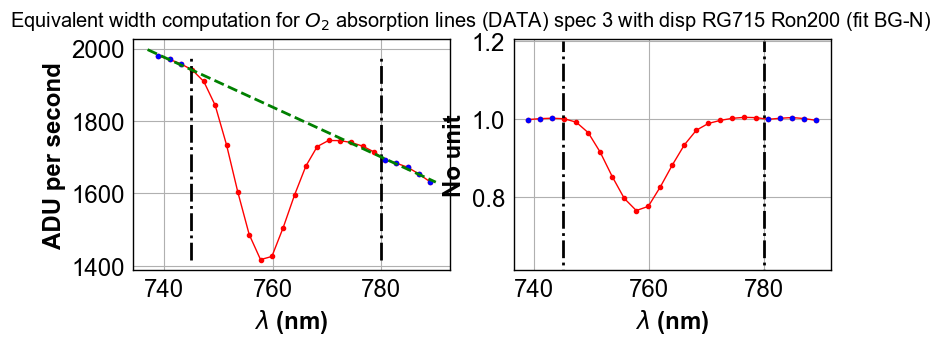

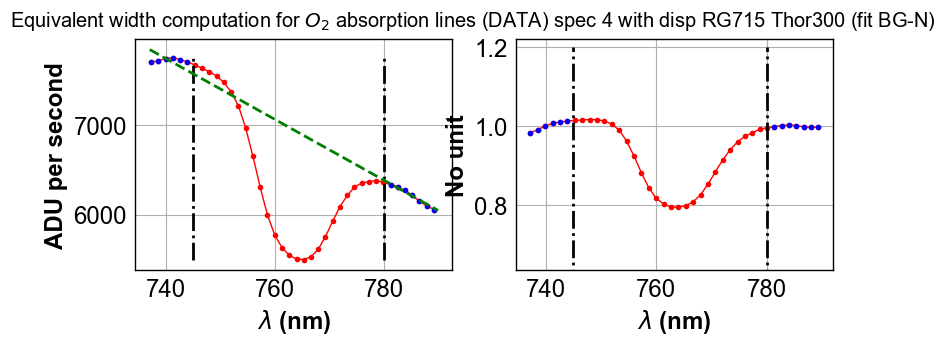

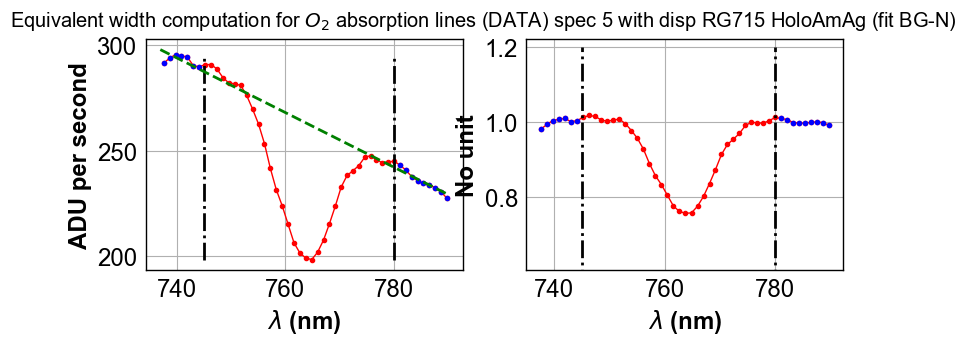

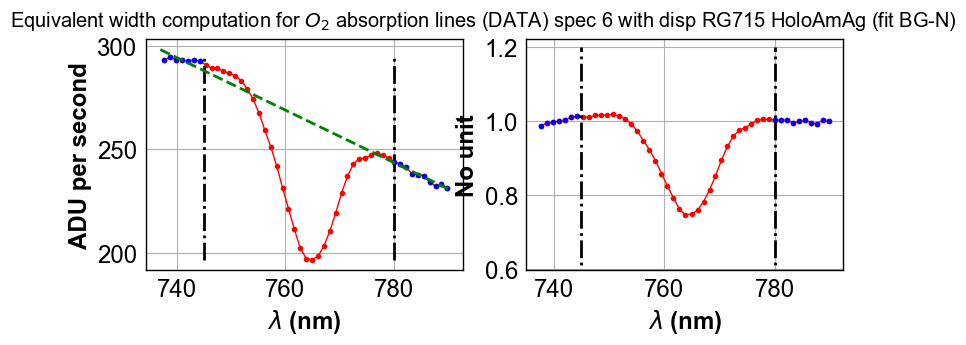

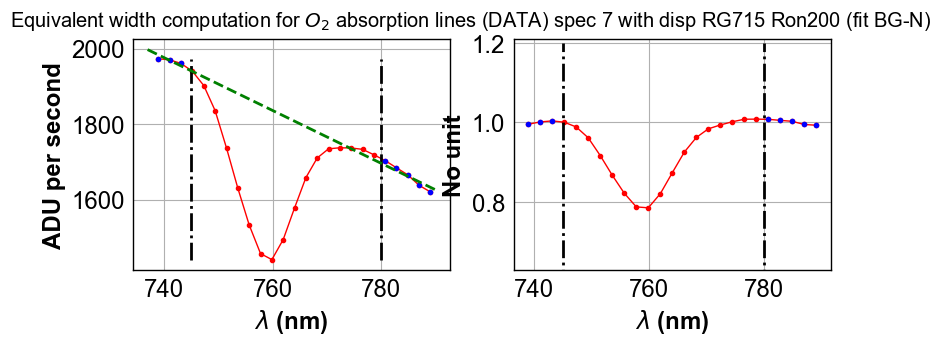

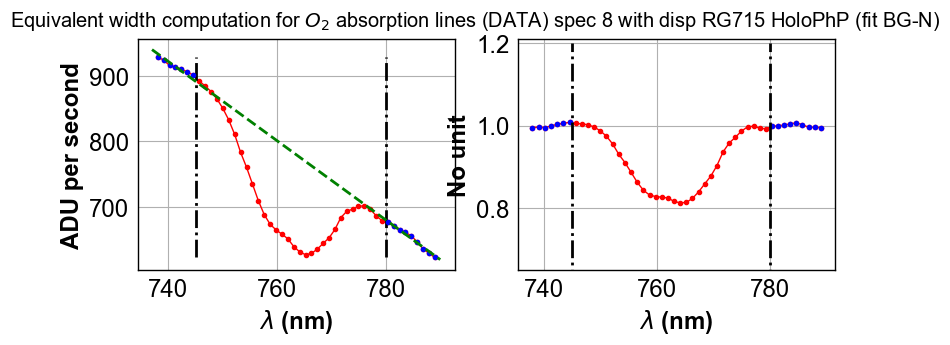

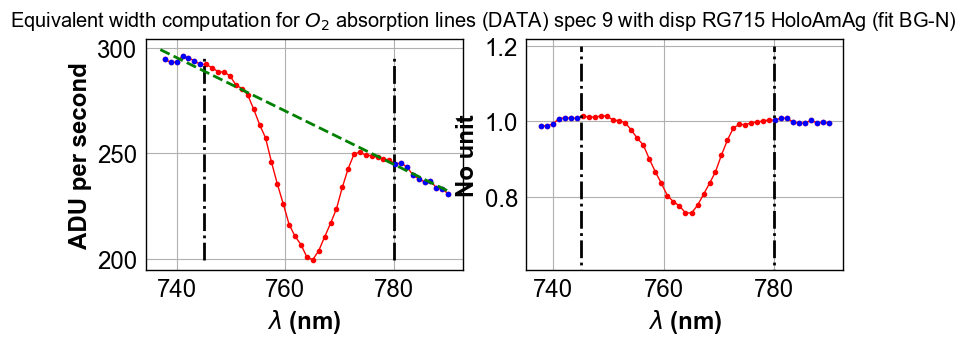

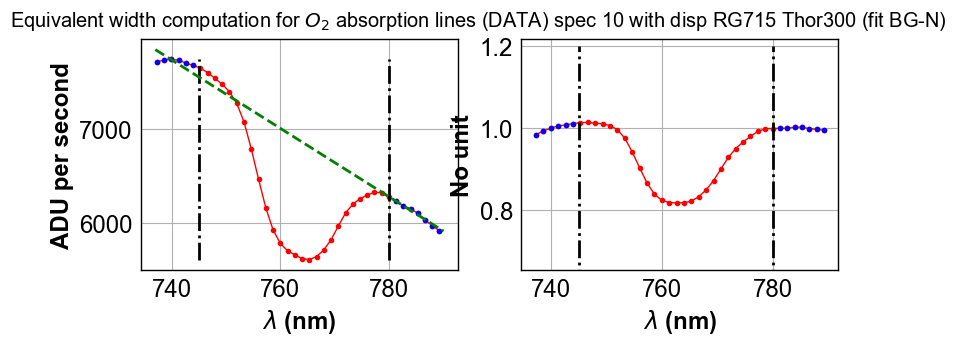

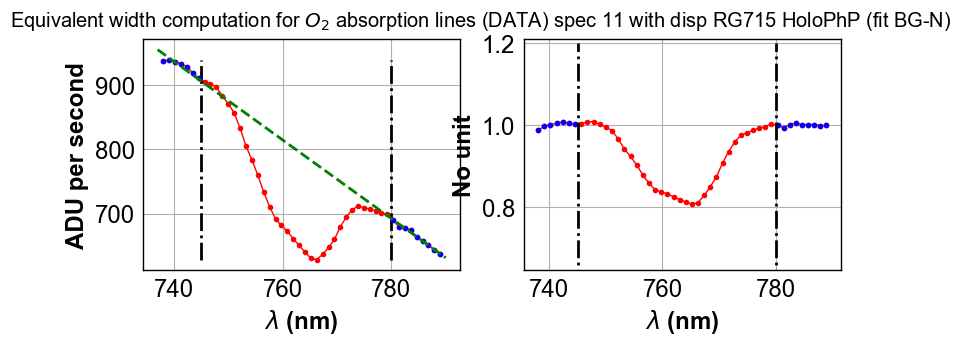

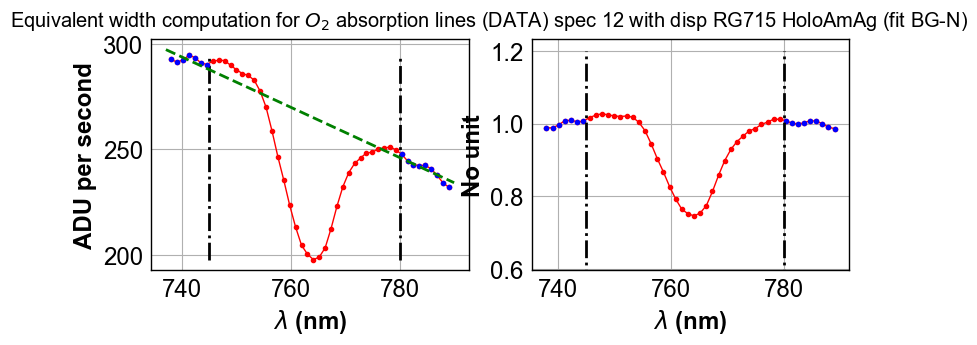

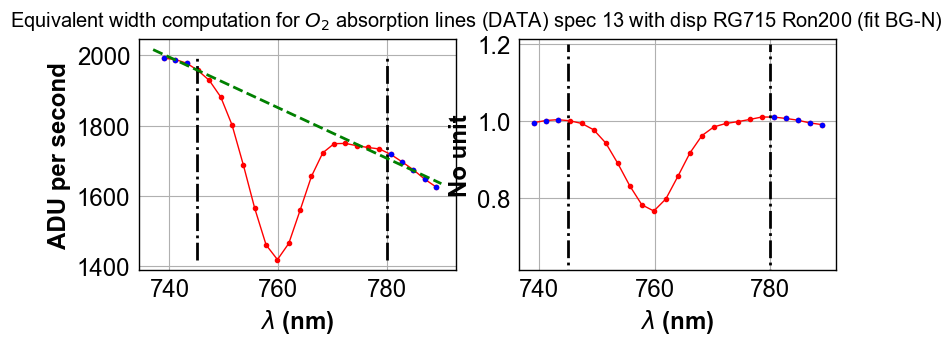

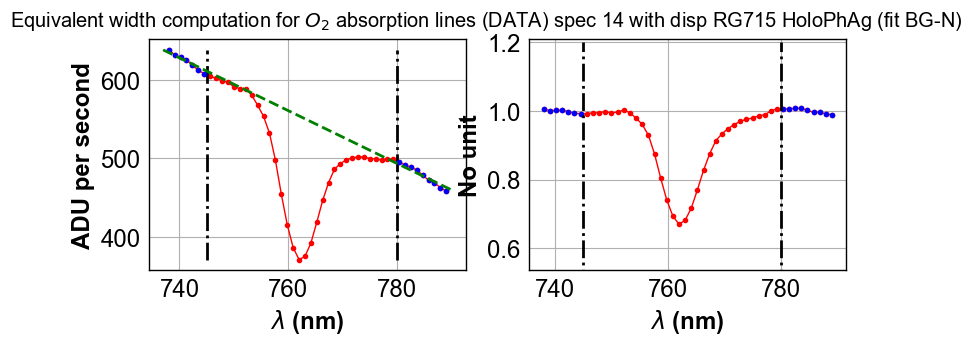

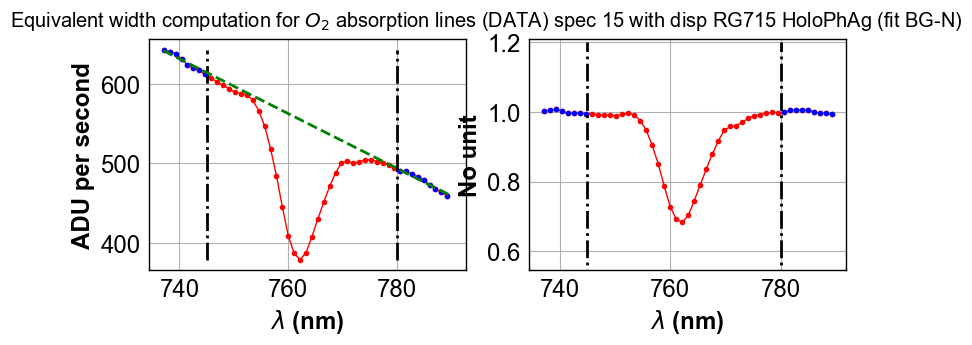

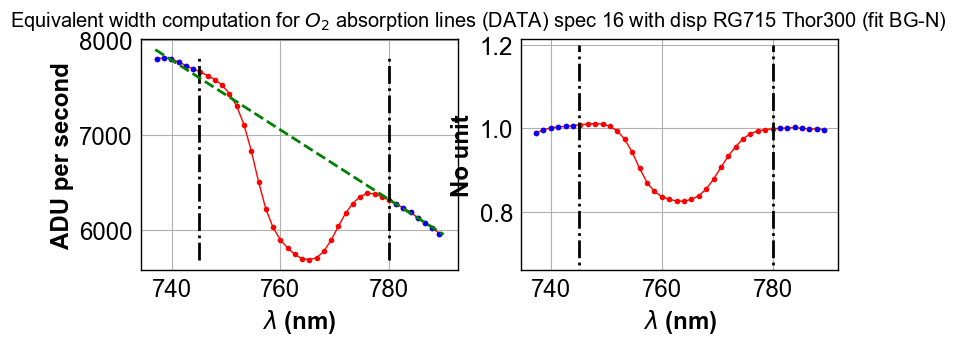

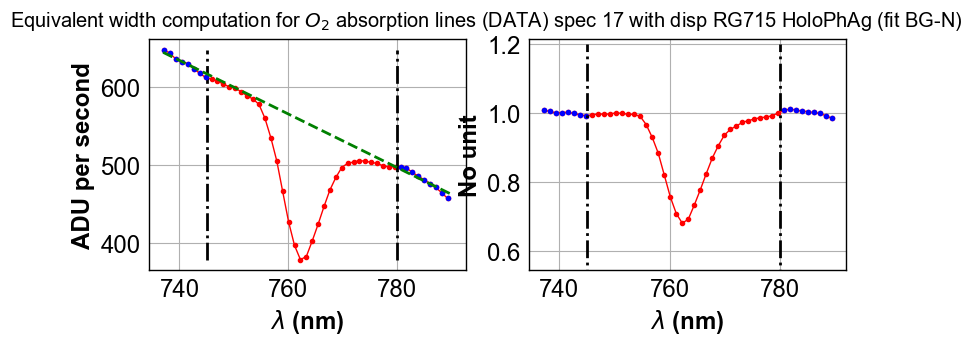

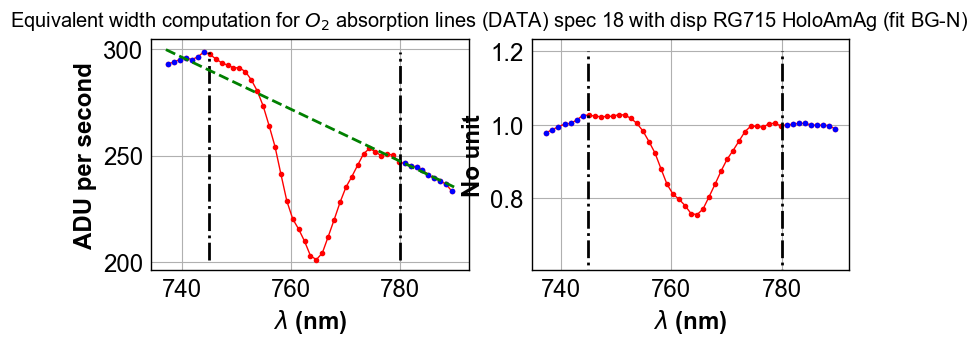

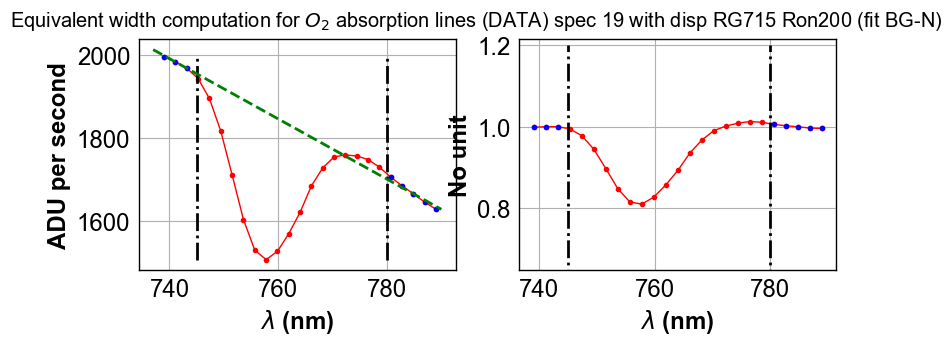

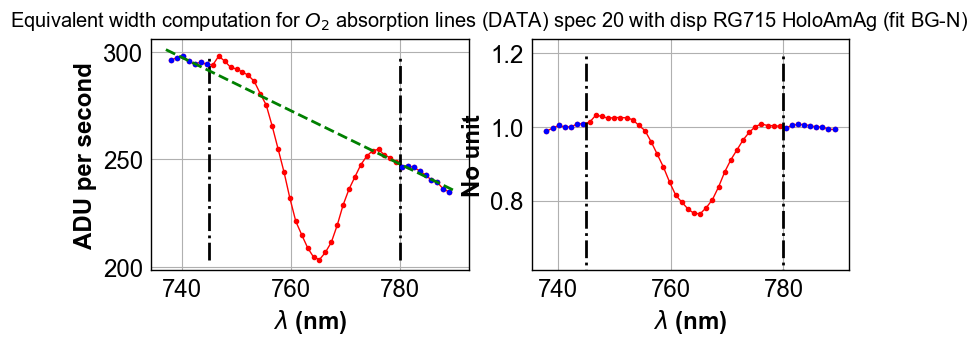

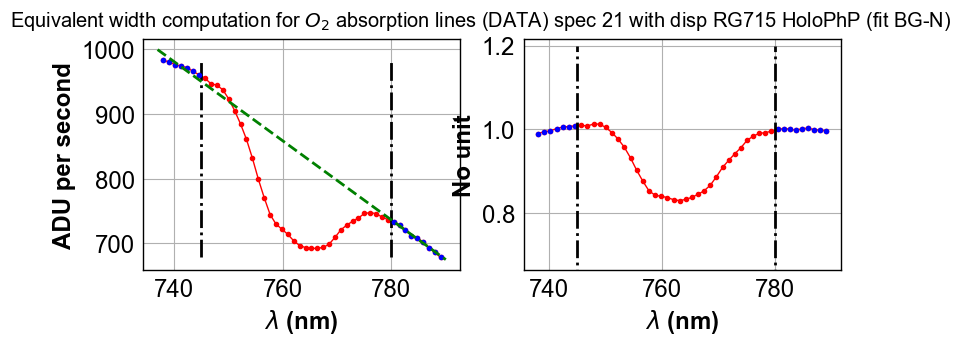

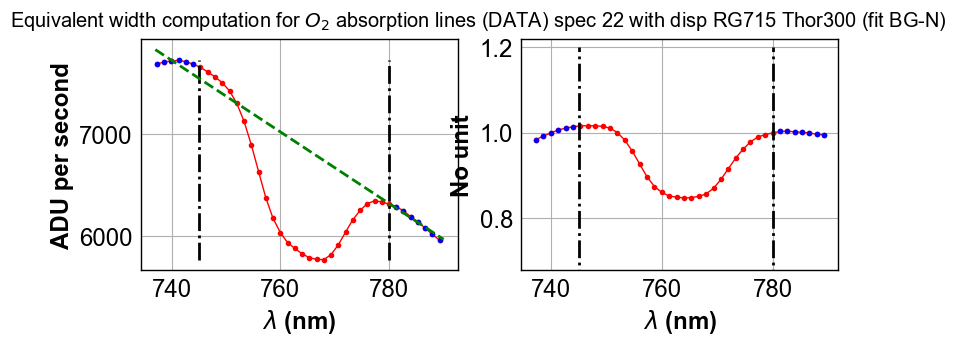

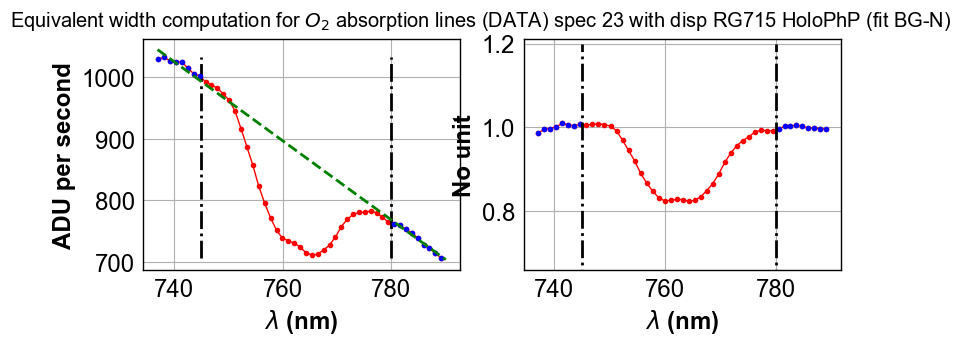

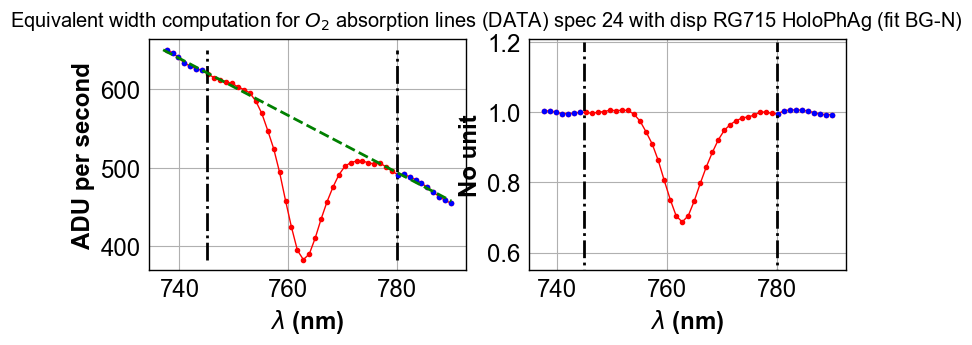

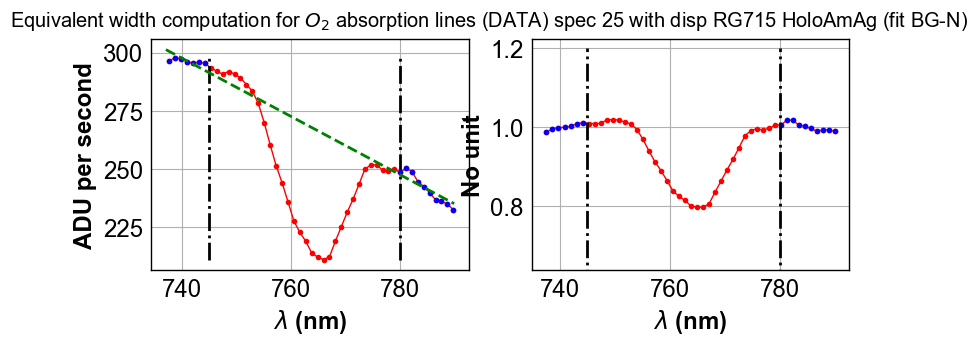

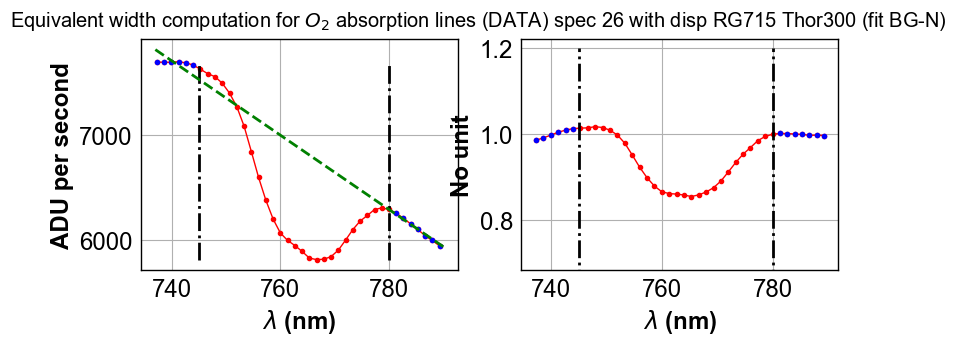

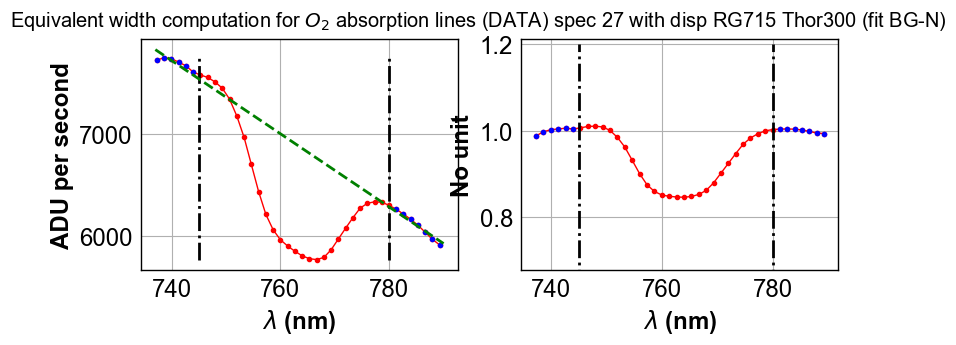

In [48]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_wl,all_rightspectra_data,all_filt,WL1_O2_DATA,WL2_O2_DATA,WL3_O2_DATA,WL4_O2_DATA,ndeg=n_order_fit_o2_data,label='$O_2$ absorption lines (DATA)')

#### Show Non  Linear Fit of Background with Stastitical errors in DATA 

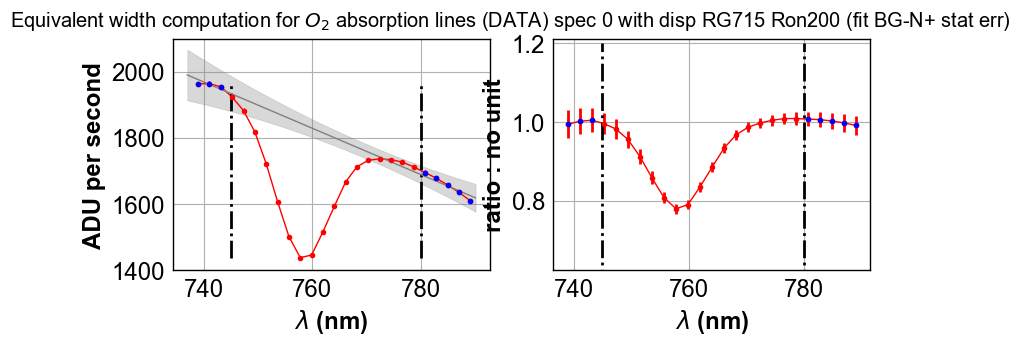

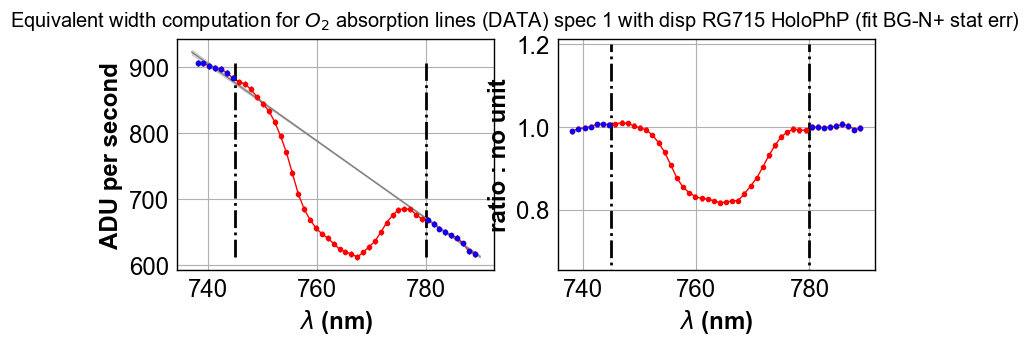

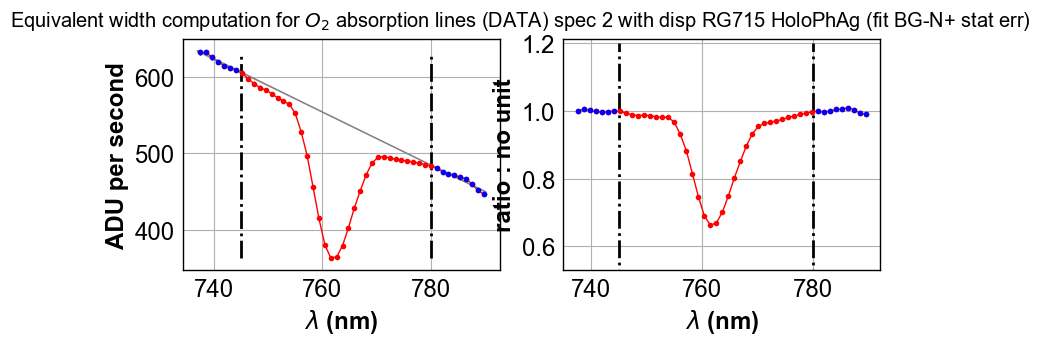

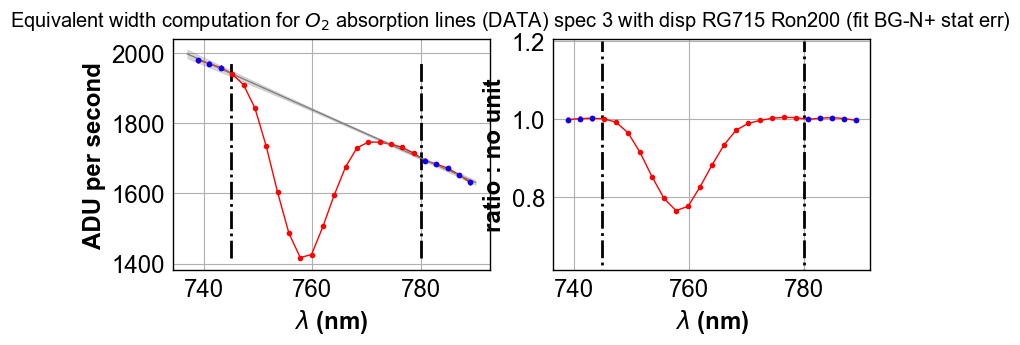

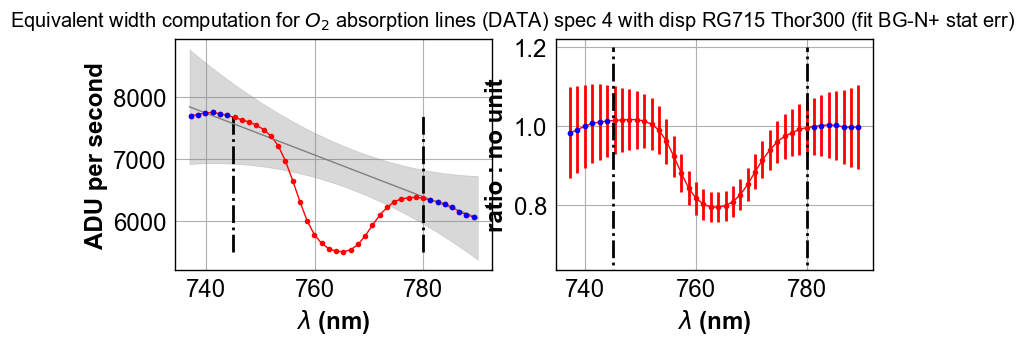

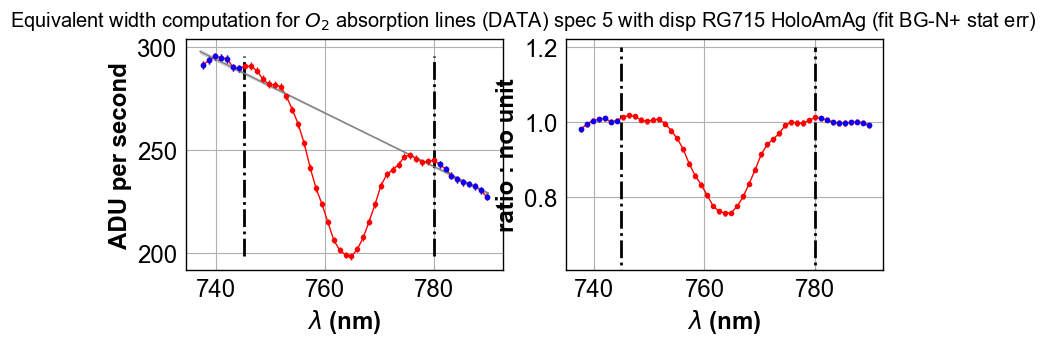

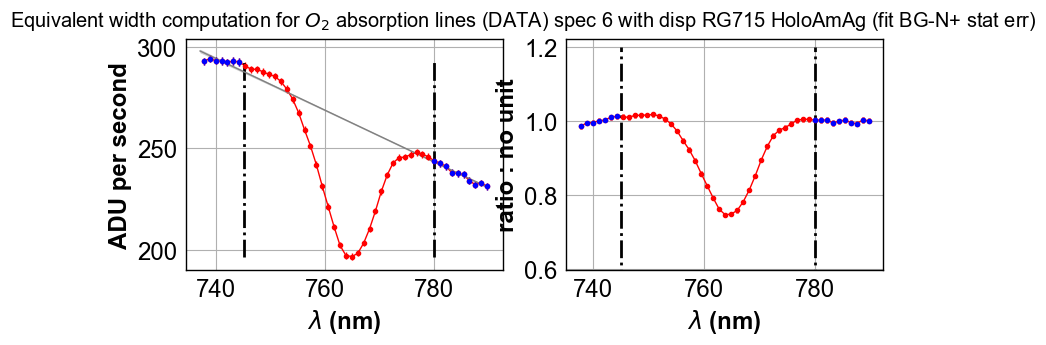

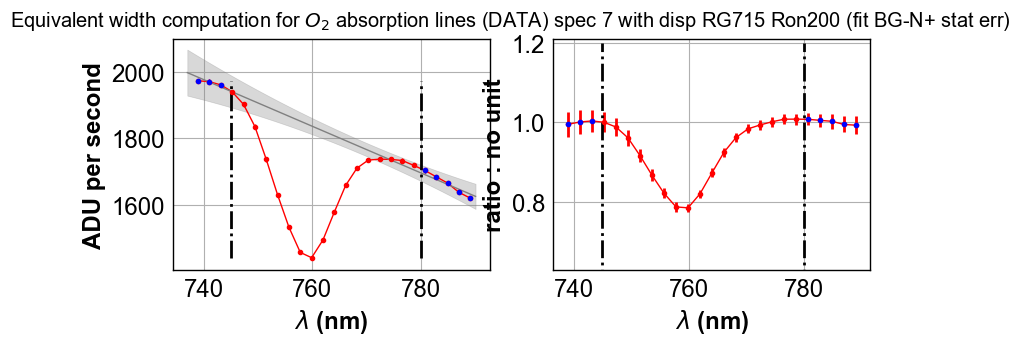

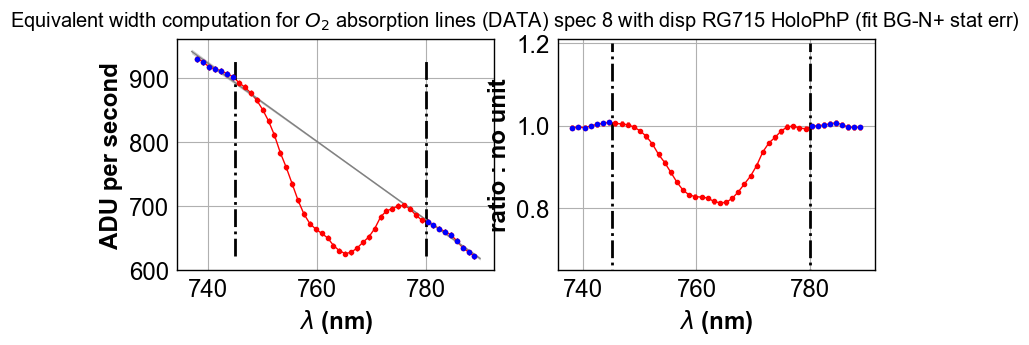

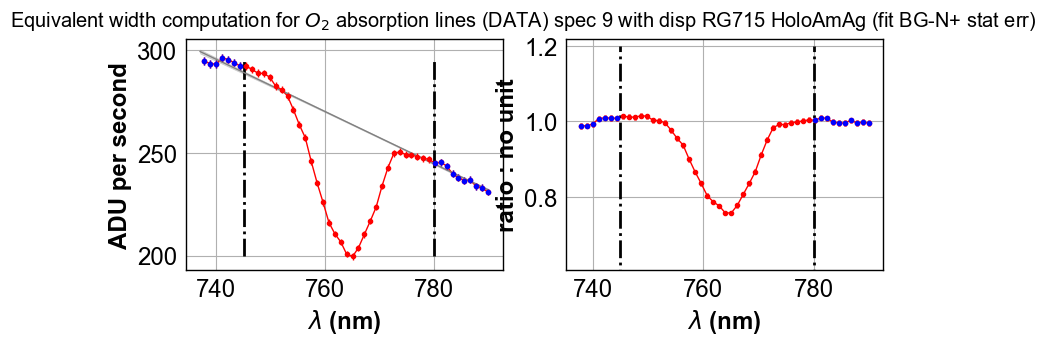

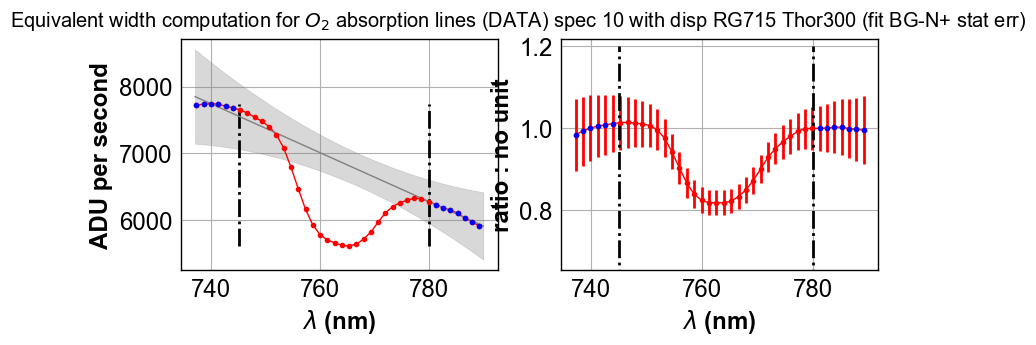

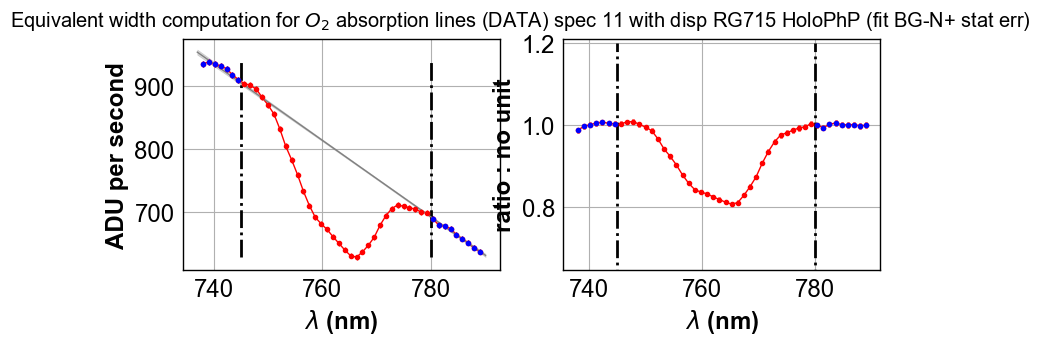

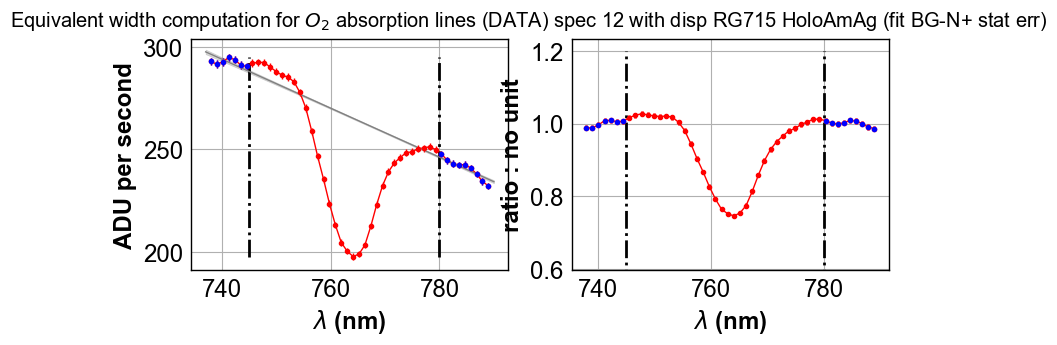

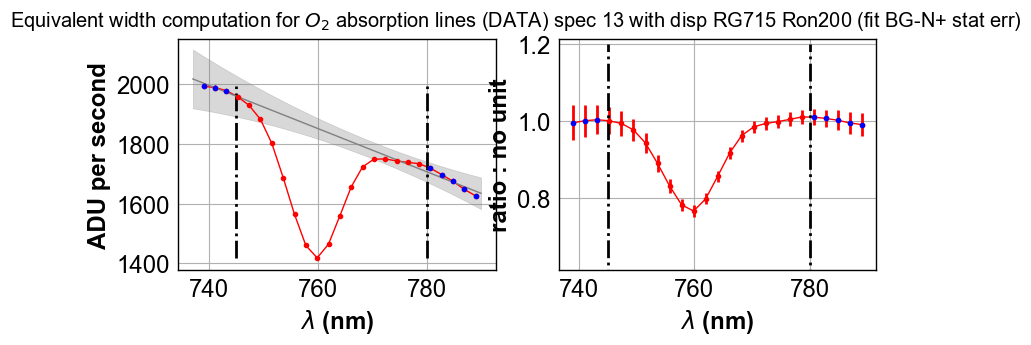

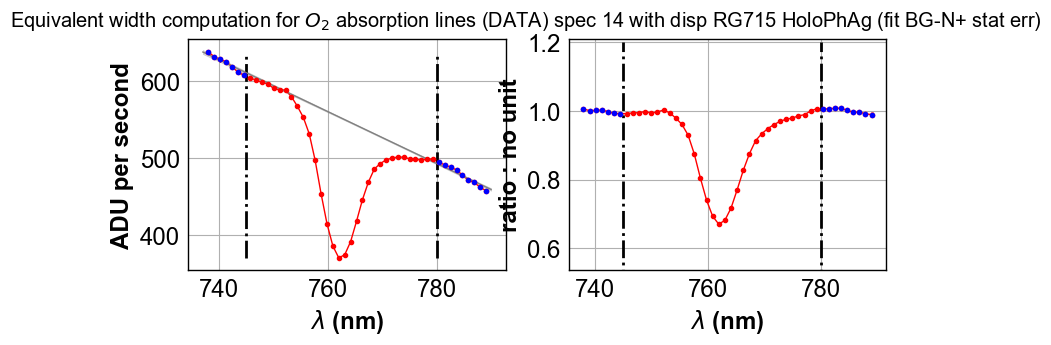

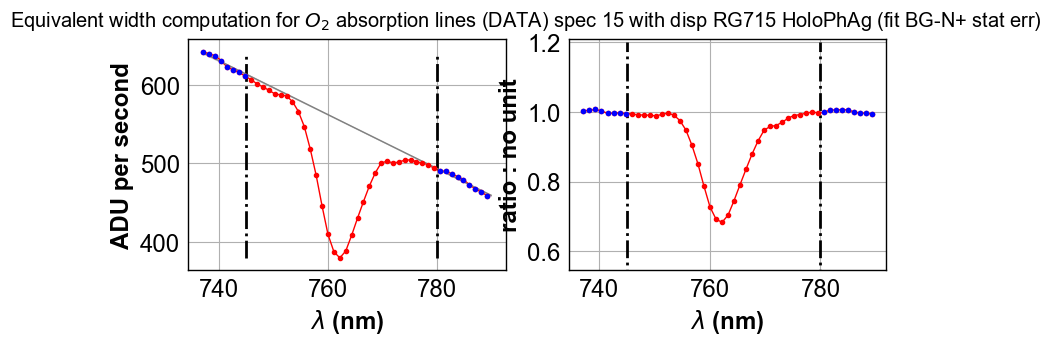

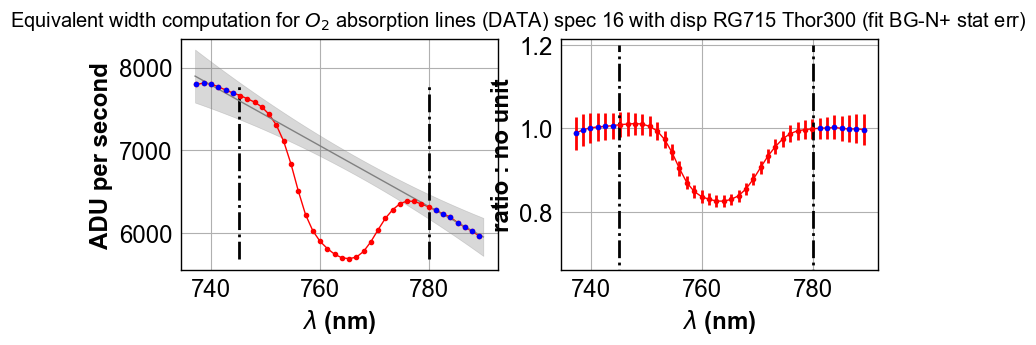

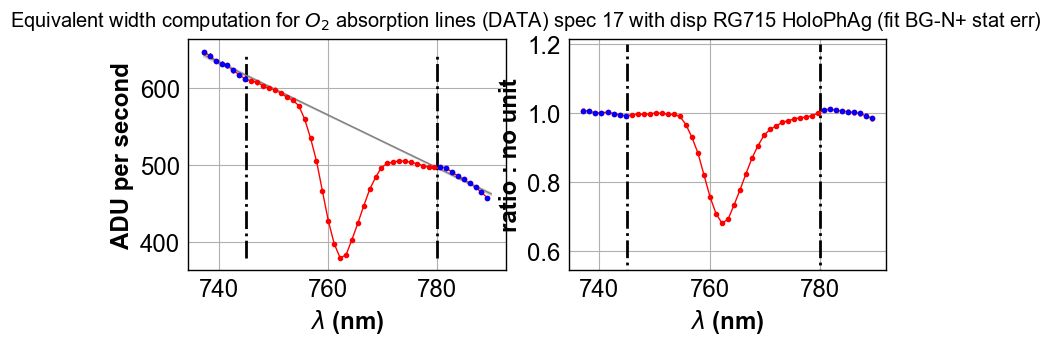

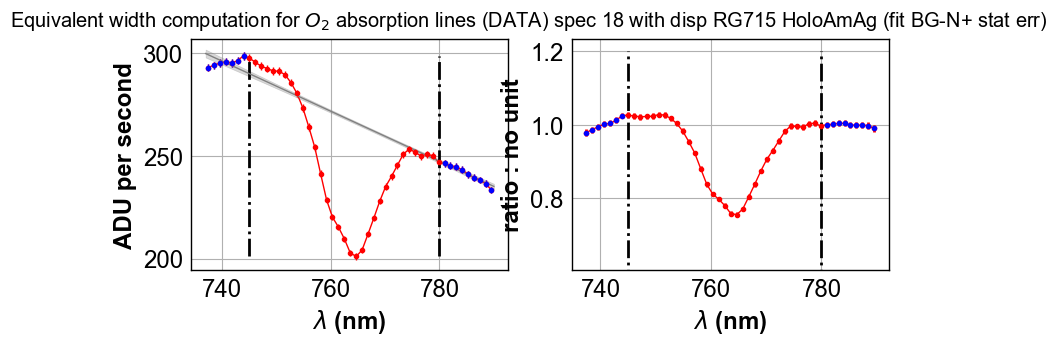

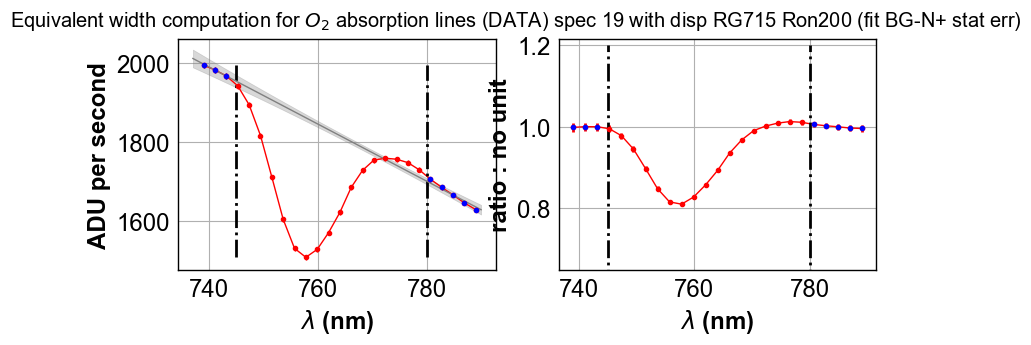

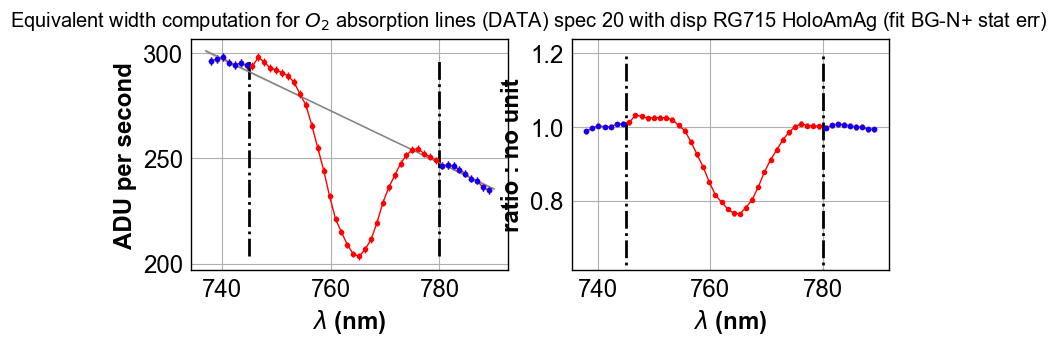

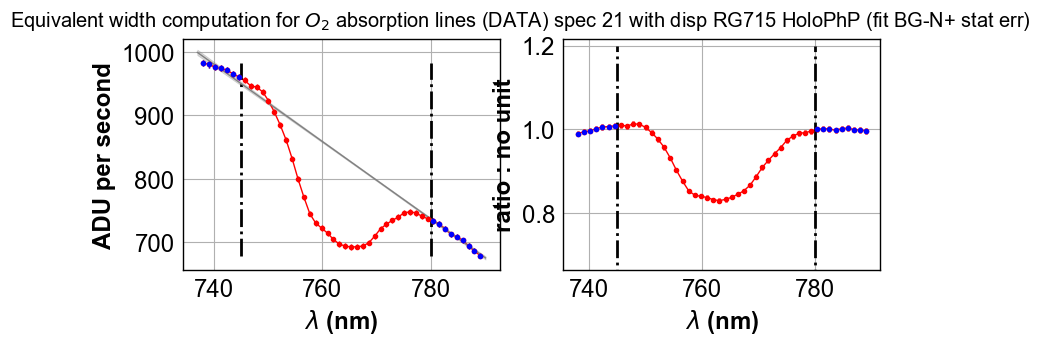

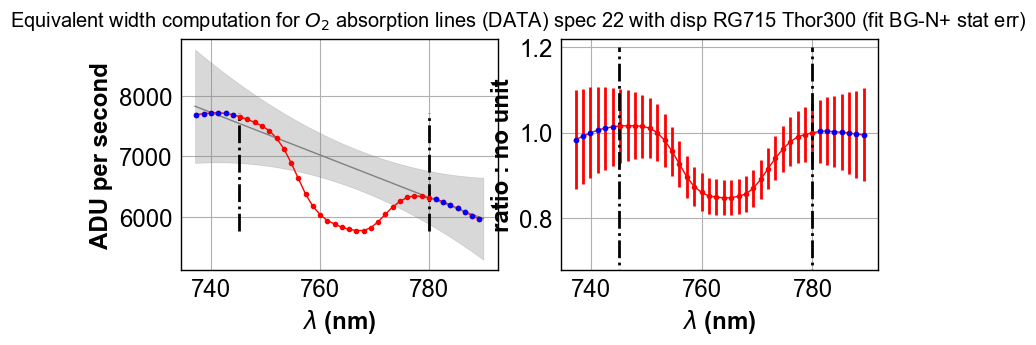

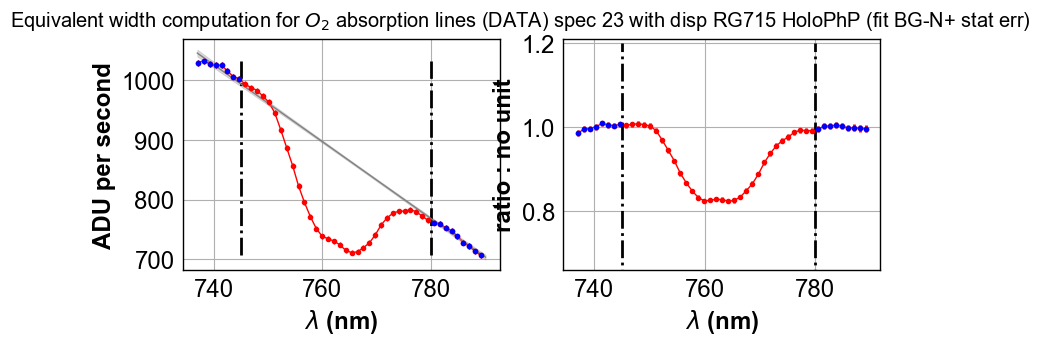

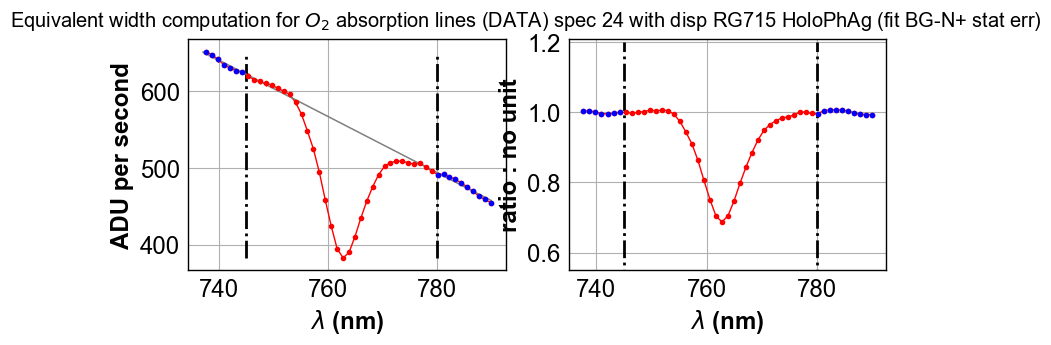

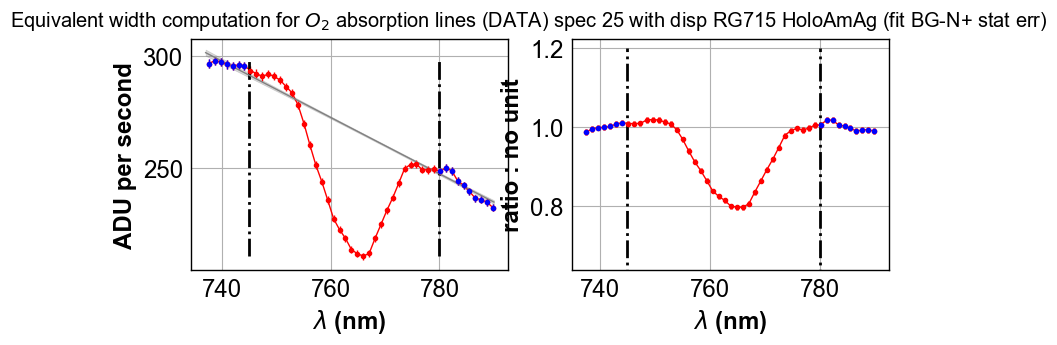

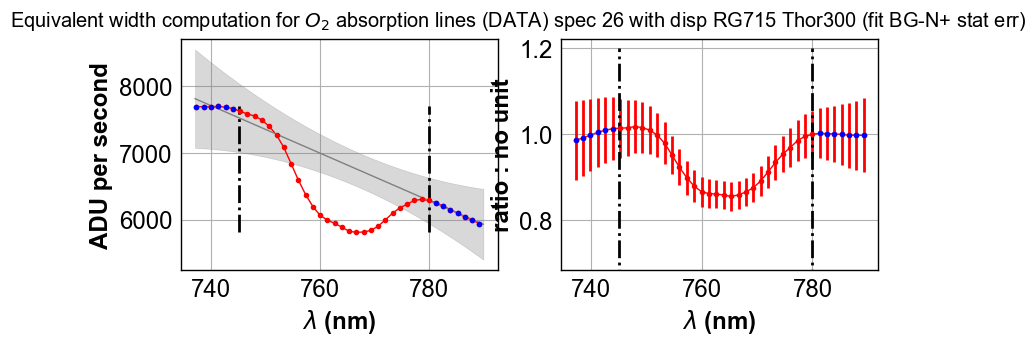

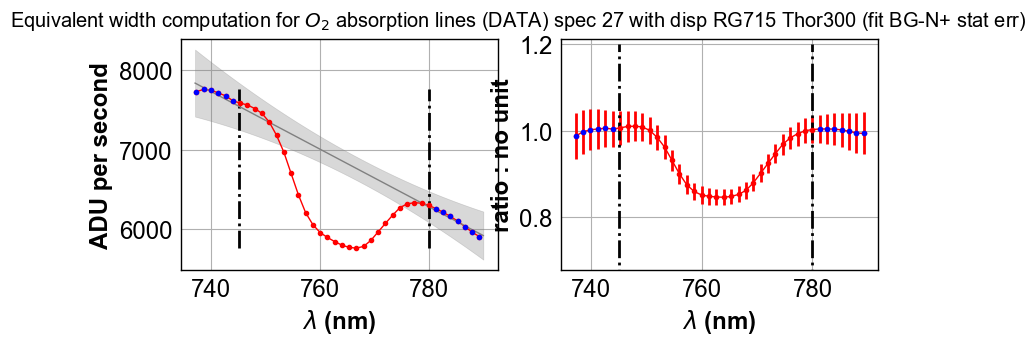

In [49]:
ShowAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,all_filt,WL1_O2_DATA,WL2_O2_DATA,WL3_O2_DATA,WL4_O2_DATA,ndeg=n_order_fit_o2_data,label='$O_2$ absorption lines (DATA)')

#### Show Non  Linear Fit of Background in Simulation

IndexError: list index out of range

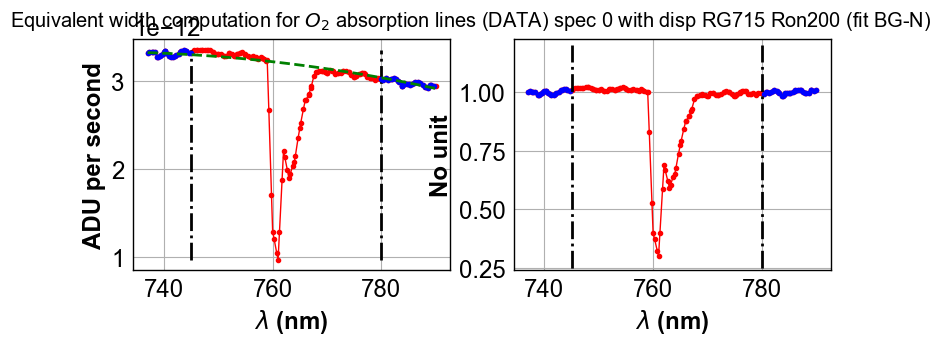

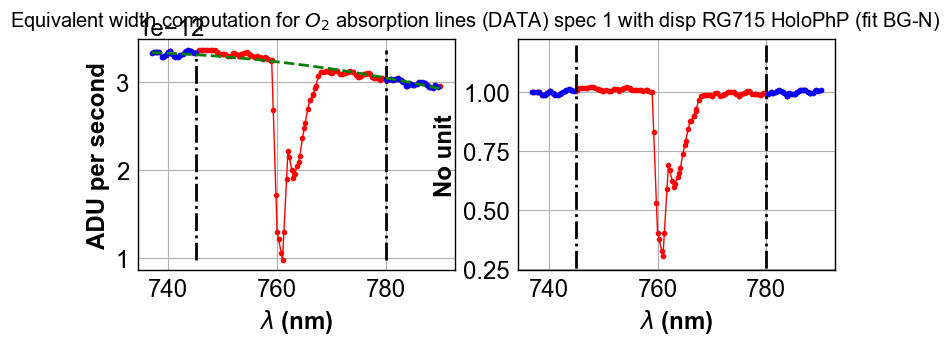

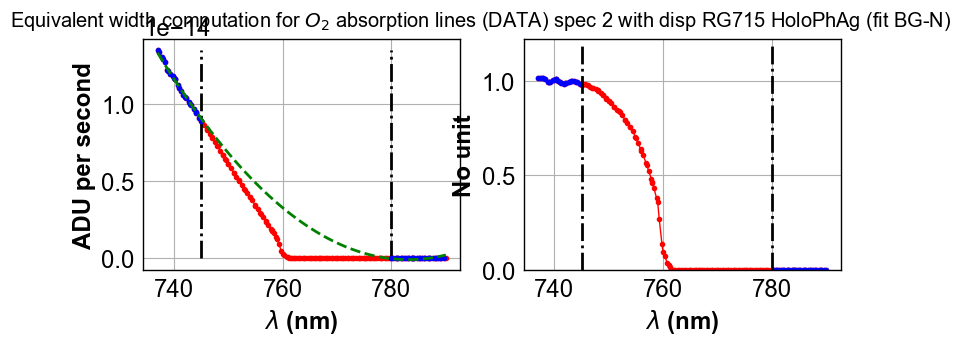

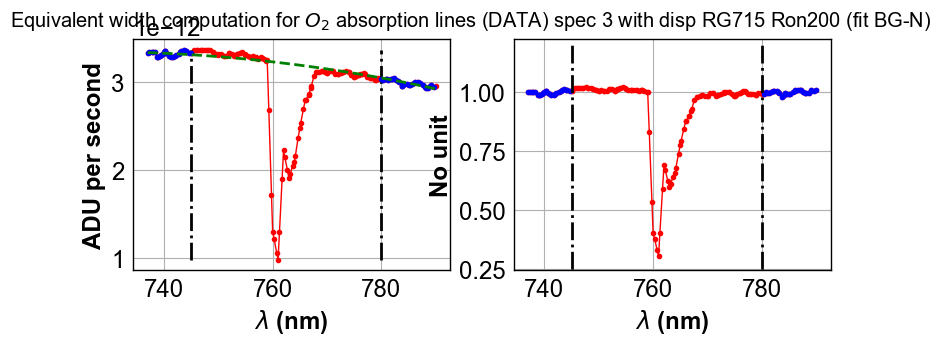

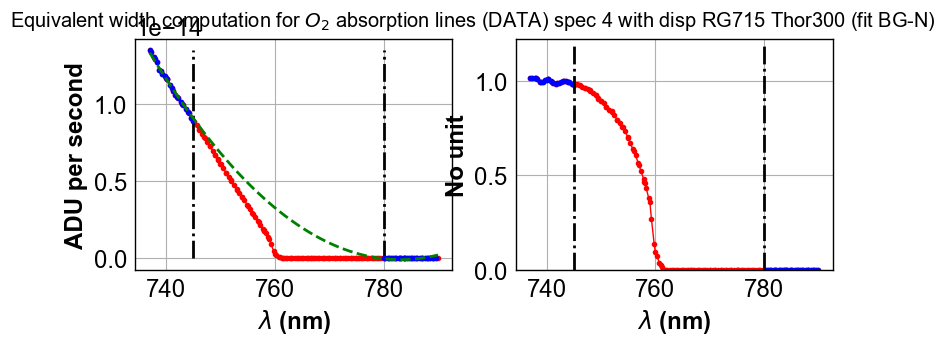

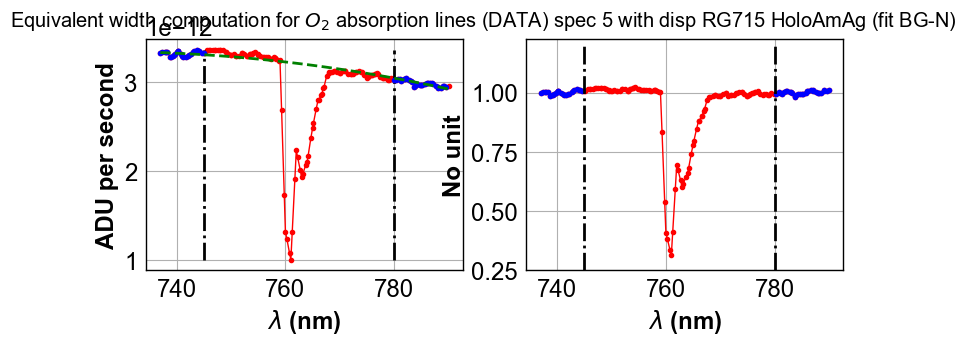

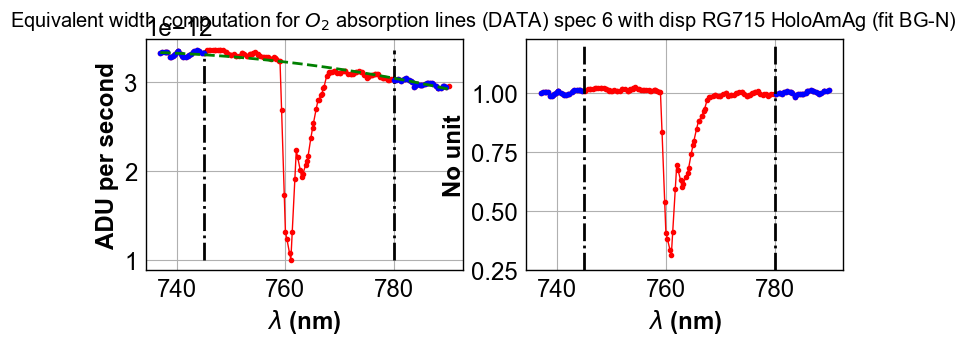

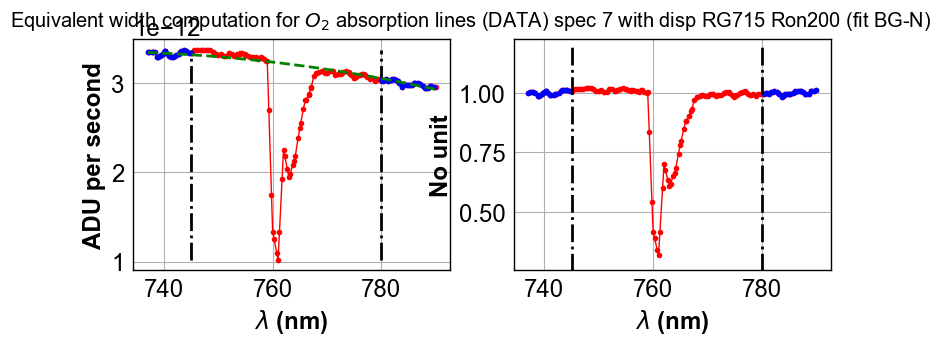

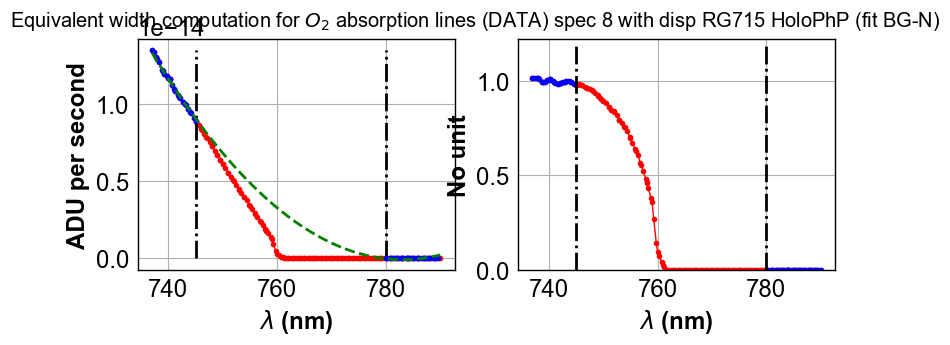

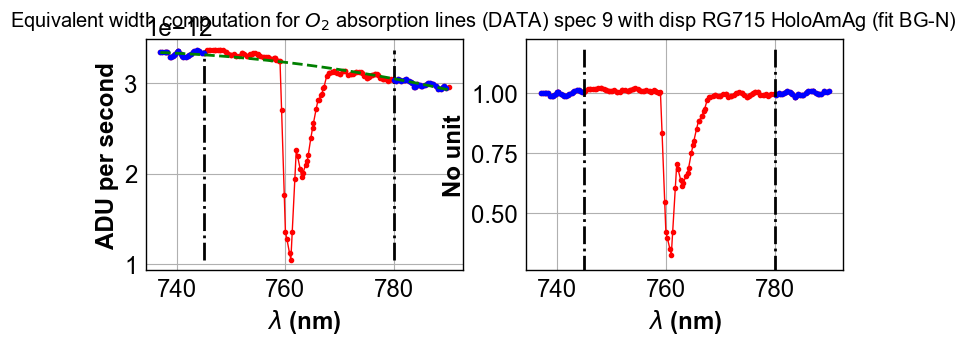

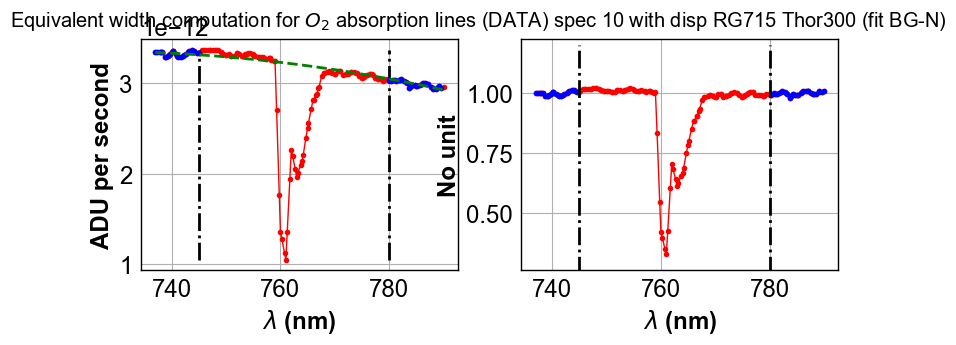

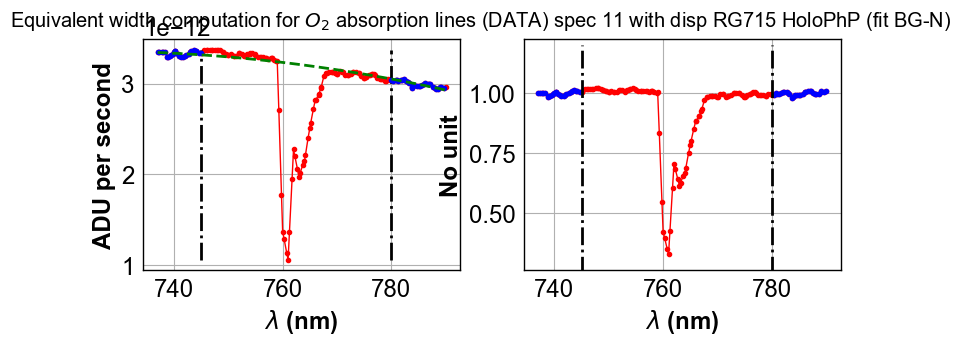

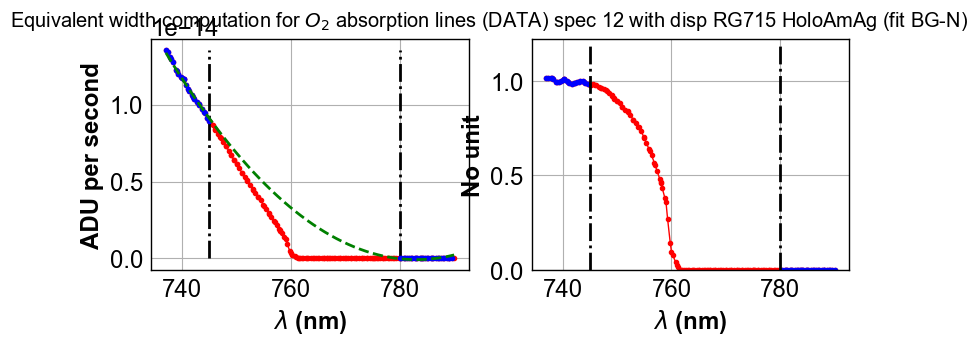

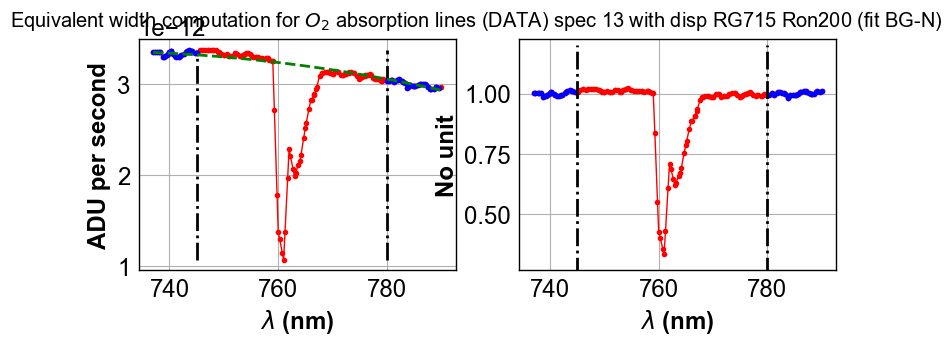

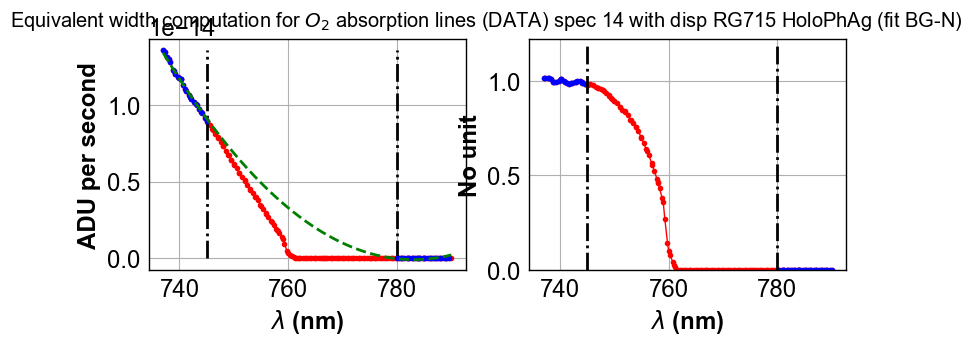

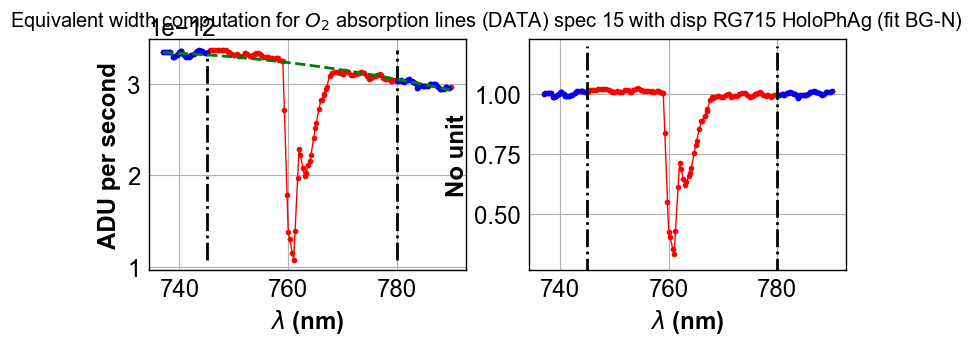

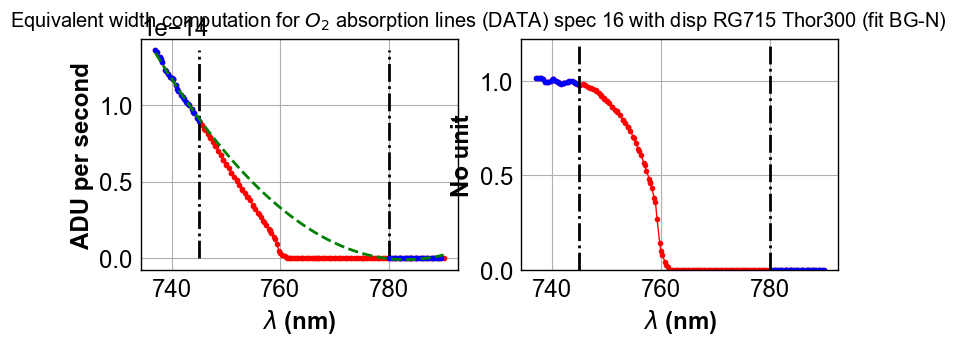

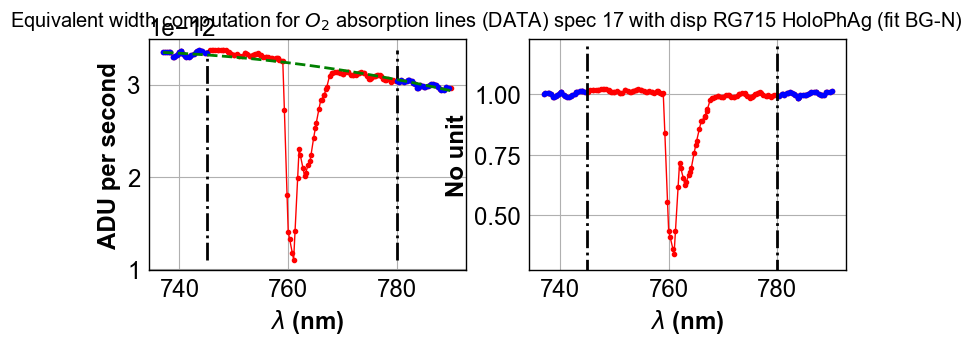

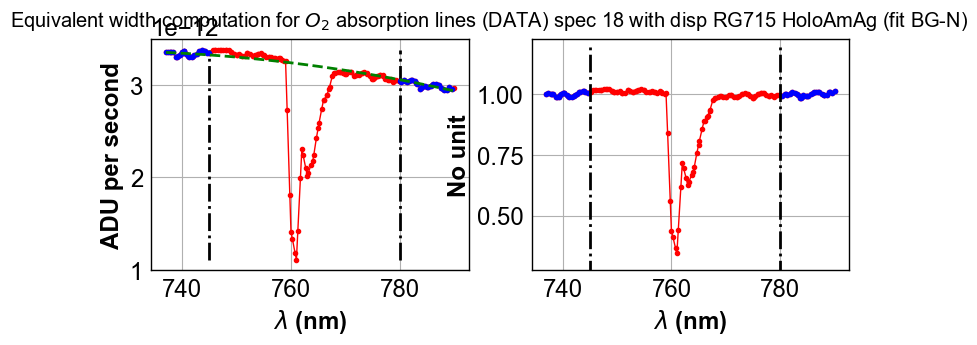

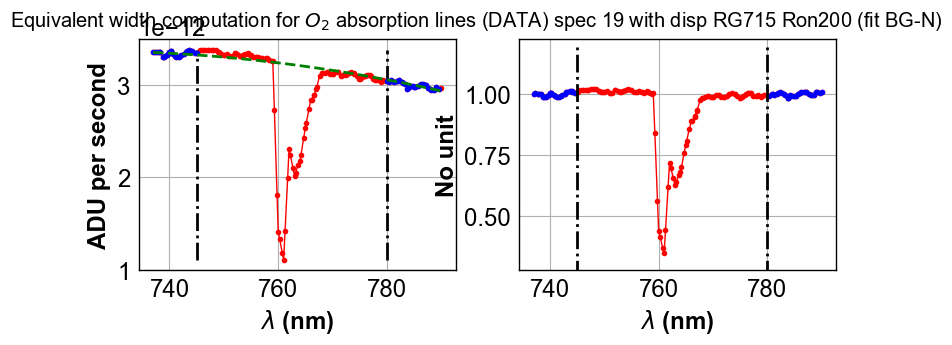

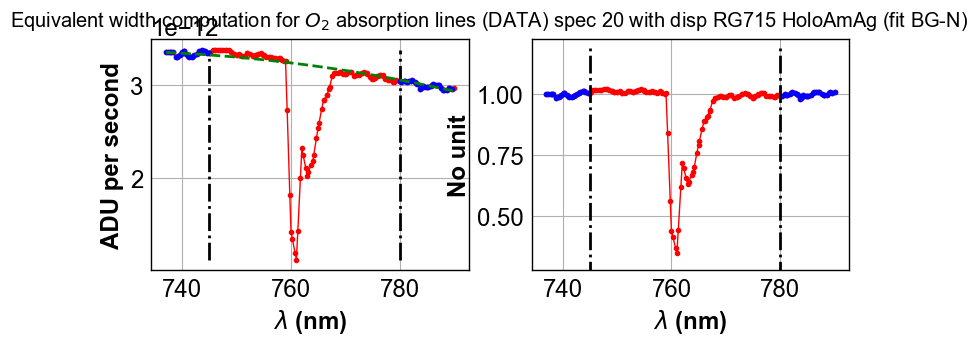

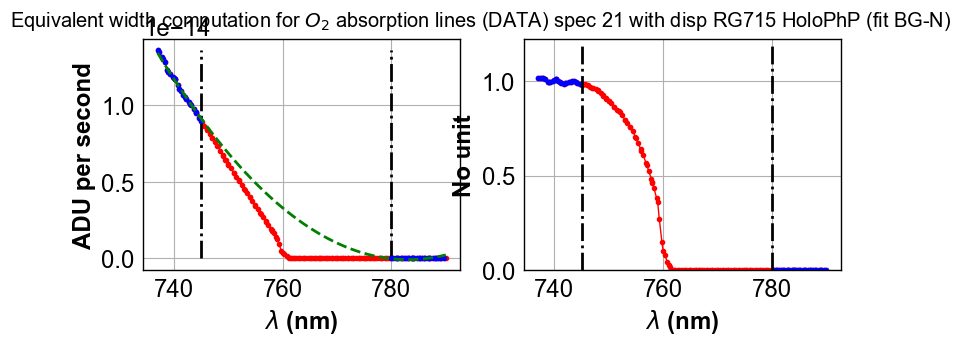

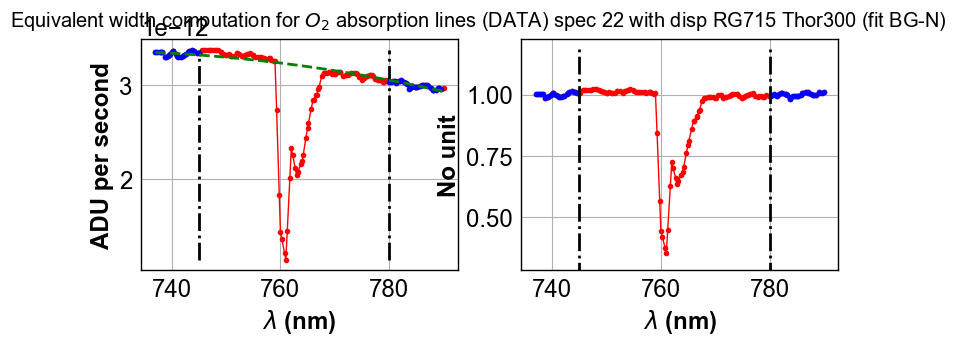

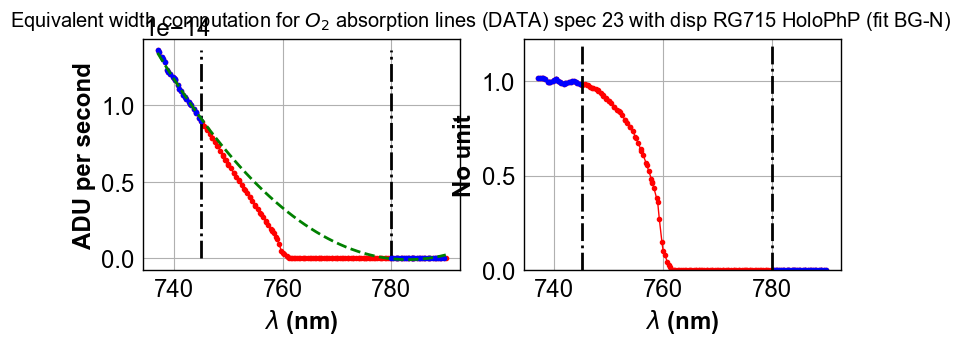

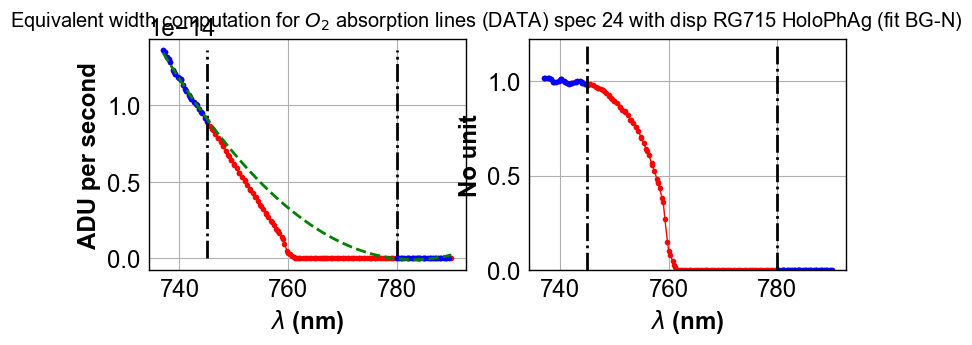

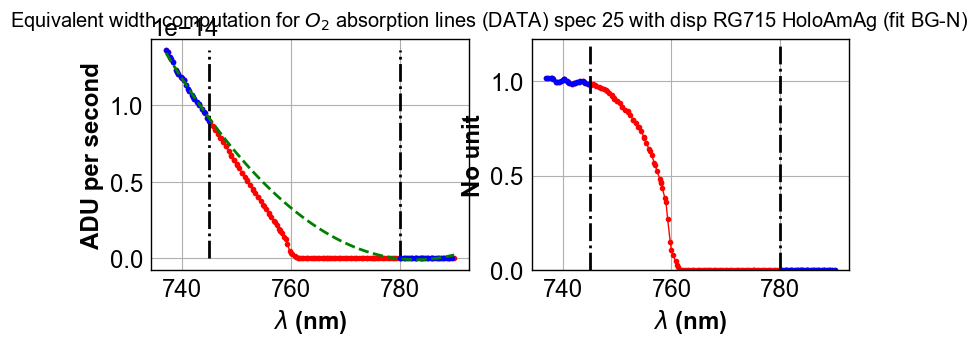

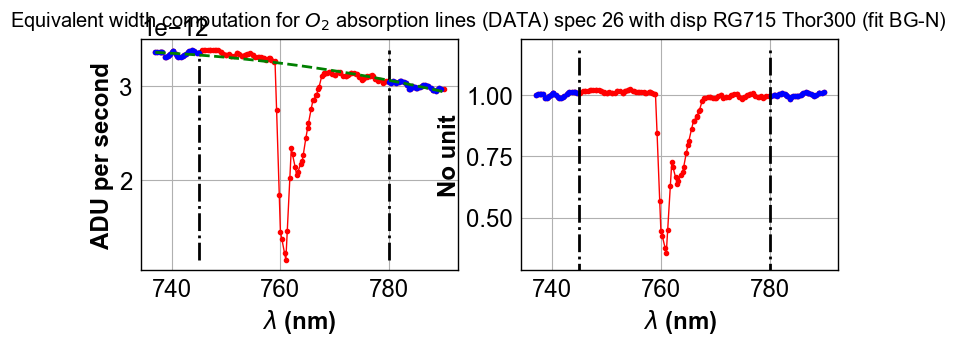

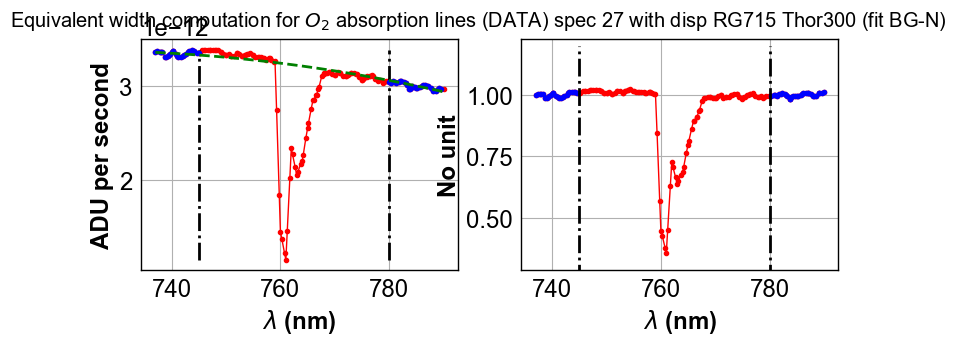

In [50]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,all_filt,WL1_O2_SIM,WL2_O2_SIM,WL3_O2_SIM,WL4_O2_SIM,ndeg=n_order_fit_o2_sim,label='$O_2$ absorption lines (DATA)')

### Compute All $O_2$ absorption lines 
-------------------------------

In [ ]:
All_eqw_O2_Data, All_eqw_O2_Data_Err=ComputeAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,WL1_O2_DATA,WL2_O2_DATA,WL3_O2_DATA,WL4_O2_DATA,ndeg=n_order_fit_o2_data)

In [ ]:
print All_eqw_O2_Data

In [ ]:
print All_eqw_O2_Data_Err

In [ ]:
All_eqw_O2_Sim=ComputeAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,WL1_O2_SIM,WL2_O2_SIM,WL3_O2_SIM,WL4_O2_SIM,ndeg=n_order_fit_o2_sim)

In [ ]:
print All_eqw_O2_Sim

In [ ]:
All_eqw_O2_Data=np.array(All_eqw_O2_Data)
All_eqw_O2_Data_Err=np.array(All_eqw_O2_Data_Err)
All_eqw_O2_Sim=np.array(All_eqw_O2_Sim)

### Show All $O_2$ Equivalent width vs Airmass
-------------------------------

In [ ]:
am=np.array(all_airmass)

In [ ]:
PlotEquivalentWidthVsAirMass(All_eqw_O2_Data,All_eqw_O2_Sim,am,all_filt,'$O_2$',dir_top_images,'eqwvsam_O2.pdf',spec_err=All_eqw_O2_Data_Err)

### Show All $O_2$ Equivalent width vs time

In [ ]:
PlotEquivalentWidthVsTime(All_eqw_O2_Data,All_eqw_O2_Sim,am,all_dt,all_filt,'$O_2$',dir_top_images,'eqwvsdt_O2.pdf',spec_err=All_eqw_O2_Data_Err)

## $H_2O$ absorption band

### Individual bands

In [ ]:
H2OWL1=910
H2OWL2=920
H2OWL3=984
H2OWL4=995

#### Selection of spectrum

In [ ]:
sel=4
thewl,thespectrum,thespecstaterr,thesimwl,thesimspectrum,thelabel=SelectTheSpectrum(sel)
thelabel_data=thelabel+', $H_2O$ band (DATA)'
thelabel_sim=thelabel+', $H_2O$ band (SIM)'

#### Selection of order to fit background

In [ ]:
n_order_fit_h2o_data=1
n_order_fit_h2o_sim=1

#### Linear fit of background in Data

In [ ]:
EQW_H2O_DATA = ShowEquivalentWidth(thewl,thespectrum,H2OWL1,H2OWL2,H2OWL3,H2OWL4,label=thelabel_data)
print ' EQW_DATA = ',EQW_H2O_DATA,' nm'

#### Linear fit of background in Simulation

In [ ]:
EQW_H2O_SIM = ShowEquivalentWidth(thesimwl,thesimspectrum,H2OWL1,H2OWL2,H2OWL3,H2OWL4,label=thelabel_sim)
print ' EQW_SIM = ',EQW_H2O_SIM,' nm'

#### Non Linear fit of background in Data

In [ ]:
EQW_H2O_DATA = ShowEquivalentWidthNonLinear(thewl,thespectrum,H2OWL1,H2OWL2,H2OWL3,H2OWL4,ndeg=n_order_fit_h2o_data,label=thelabel_data)
print ' EQW_DATA = ',EQW_H2O_DATA,' nm'

#### Non Linear fit of background with statistical error in Data

In [ ]:
EQW_H2O_DATA,EQW_H2O_DATA_ERR = ShowEquivalentWidthNonLinearwthStatErr(thewl,thespectrum,thespecstaterr,H2OWL1,H2OWL2,H2OWL3,H2OWL4,ndeg=n_order_fit_h2o_data,label=thelabel_data)
print ' EQW_DATA = ',EQW_H2O_DATA,'+/-',EQW_H2O_DATA_ERR,' nm'

#### Non Linear fit of background in Simulation

In [ ]:
EQW_H2O_SIM = ShowEquivalentWidthNonLinear(thesimwl,thesimspectrum,H2OWL1,H2OWL2,H2OWL3,H2OWL4,ndeg=n_order_fit_h2o_sim,label=thelabel_sim)
print ' EQW_SIM = ',EQW_H2O_SIM,' nm'

### Show all absorption bands

In [ ]:
WL1_H2O_DATA=H2OWL1
WL2_H2O_DATA=H2OWL2
WL3_H2O_DATA=H2OWL3
WL4_H2O_DATA=H2OWL4

In [ ]:
WL1_H2O_SIM=H2OWL1
WL2_H2O_SIM=H2OWL2
WL3_H2O_SIM=H2OWL3
WL4_H2O_SIM=H2OWL4

#### Show Linear Fit of Background in DATA 

In [ ]:
ShowAllEquivalentWidth(all_rightspectra_wl,all_rightspectra_data,all_filt,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,label='$H_2O$ absorption band (DATA)')

#### Show Non Linear Fit of Background in DATA 

In [ ]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_wl,all_rightspectra_data,all_filt,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,ndeg=n_order_fit_h2o_data,label='$H_2O$ absorption band (DATA)')

#### ShowNon  Linear Fit of Background with Statistical errors in DATA 

In [ ]:
ShowAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,all_filt,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,ndeg=n_order_fit_h2o_data,label='$H_2O$ absorption lines (DATA)')

#### Show Non Linear Fit of Background in Simulation

In [ ]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,all_filt,WL1_H2O_SIM,WL2_H2O_SIM,WL3_H2O_SIM,WL4_H2O_SIM,ndeg=n_order_fit_h2o_sim,label='$H_2O$ absorption band (SIM)')

### Compute $H_2O$ Equivalent width

#### Compute Non Linear equivalent width in data

In [ ]:
All_eqw_H2O_Data, All_eqw_H2O_Data_Err=ComputeAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,ndeg=n_order_fit_h2o_data)

In [ ]:
print All_eqw_H2O_Data

In [ ]:
print All_eqw_H2O_Data_Err

#### Compute Non Linear equivalent width in simulation

In [ ]:
All_eqw_H2O_Sim=ComputeAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,WL1_H2O_SIM,WL2_H2O_SIM,WL3_H2O_SIM,WL4_H2O_SIM,ndeg=n_order_fit_h2o_sim)

In [ ]:
print All_eqw_H2O_Sim

### Plot Equivalent width vs airmass

In [ ]:
PlotEquivalentWidthVsAirMass(All_eqw_H2O_Data,All_eqw_H2O_Sim,am,all_filt,'$H_2O$',dir_top_images,'eqwvsam_H2O.pdf',spec_err=All_eqw_H2O_Data_Err)

### Plot Equivalent width vs time

In [ ]:
PlotEquivalentWidthVsTime(All_eqw_H2O_Data,All_eqw_H2O_Sim,am,all_dt,all_filt,'$H_2O$',dir_top_images,'eqwvsdt_H2O.pdf',spec_err=All_eqw_H2O_Data_Err)

## Ratio of Equivalent Width  $H_2O/O_2$

### Compute the ratio of equivalent Width

In [ ]:
All_eqw_Ratio_Data=All_eqw_H2O_Data/All_eqw_O2_Data
All_eqw_Ratio_Sim=All_eqw_H2O_Sim/All_eqw_O2_Sim

All_eqw_Ratio_Data_Err=All_eqw_Ratio_Data* \
    ( np.sqrt((All_eqw_H2O_Data_Err/All_eqw_H2O_Data)**2+(All_eqw_O2_Data_Err/All_eqw_O2_Data)**2))

In [ ]:
PlotEquivalentWidthRatioVsAirMass(All_eqw_Ratio_Data,All_eqw_Ratio_Sim,am,all_filt,'$H_2O/O_2$',dir_top_images,'eqwrtiovsam_H2O.pdf',ratio_err=All_eqw_Ratio_Data_Err)

## $H_\beta$ line

### Definitions

#### Region of $H_\beta$

In [ ]:
HBETAWL1=470
HBETAWL2=477
HBETAWL3=495
HBETAWL4=500

#### Selection of spectrum under study

In [ ]:
sel=0
thewl,thespectrum,thespecstaterr,thesimwl,thesimspectrum,thelabel=SelectTheSpectrum(sel)
thelabel_data=thelabel+' $H_\\beta$ line (DATA)'
thelabel_sim=thelabel+' $H_\\beta$ line (SIM)'

#### Order for the fit of background

In [ ]:
n_order_fit_hbeta_data=1
n_order_fit_hbeta_sim=1

### Show individual lines for $H_\beta$

#### Linear fit for data

In [ ]:
EQW_HBETA_DATA = ShowEquivalentWidth(thewl,thespectrum,HBETAWL1,HBETAWL2,HBETAWL3,HBETAWL4,label=thelabel_data)
print ' EQW_DATA = ',EQW_HBETA_DATA,' nm'

#### Linear fit on Simulation

In [ ]:
EQW_HBETA_SIM = ShowEquivalentWidth(thesimwl,thesimspectrum,HBETAWL1,HBETAWL2,HBETAWL3,HBETAWL4,label=thelabel_sim)
print ' EQW_SIM = ',EQW_HBETA_SIM,' nm'

### Show all $H_\beta$ lines

In [ ]:
WL1_HBETA_DATA=HBETAWL1
WL2_HBETA_DATA=HBETAWL2
WL3_HBETA_DATA=HBETAWL3
WL4_HBETA_DATA=HBETAWL4

In [ ]:
WL1_HBETA_SIM=HBETAWL1
WL2_HBETA_SIM=HBETAWL2
WL3_HBETA_SIM=HBETAWL3
WL4_HBETA_SIM=HBETAWL4

#### Show all linear fit on data

In [ ]:
ShowAllEquivalentWidth(all_rightspectra_wl,all_rightspectra_data,all_filt,WL1_HBETA_DATA,WL2_HBETA_DATA,WL3_HBETA_DATA,WL4_HBETA_DATA,label=thelabel_data)

#### Show all non linear fit with statistical errors in data

In [ ]:
ShowAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,all_filt,WL1_HBETA_DATA,WL2_HBETA_DATA,WL3_HBETA_DATA,WL4_HBETA_DATA,ndeg=n_order_fit_hbeta_data,label='$H_\\beta$ absorption lines (DATA)')

#### Show all non linear fit  in sim

In [ ]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,all_filt,WL1_HBETA_SIM,WL2_HBETA_SIM,WL3_HBETA_SIM,WL4_HBETA_SIM,ndeg=n_order_fit_hbeta_sim,label='$H_\\beta$ absorption band (SIM)')

### Compute Equivalent width for $H_\beta$

#### Equivalent width for data

In [ ]:
All_eqw_HBETA_Data, All_eqw_HBETA_Data_Err=ComputeAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_stat_err,WL1_HBETA_DATA,WL2_HBETA_DATA,WL3_HBETA_DATA,WL4_HBETA_DATA,ndeg=n_order_fit_hbeta_data)

#### Equivalent width for simulation

In [ ]:
All_eqw_HBETA_Sim=ComputeAllEquivalentWidthNonLinear(all_rightspectra_sim_wl,all_rightspectra_sim,WL1_HBETA_SIM,WL2_HBETA_SIM,WL3_HBETA_SIM,WL4_HBETA_SIM,ndeg=n_order_fit_hbeta_sim)

### Plot Equivlent width for $H_\beta$

In [ ]:
PlotEquivalentWidthVsAirMass(All_eqw_HBETA_Data,All_eqw_HBETA_Sim,am,all_filt,'$H_\\beta$',dir_top_images,'eqwvsam_HBETA.pdf',spec_err=All_eqw_HBETA_Data_Err)

In [ ]:
PlotEquivalentWidthVsTime(All_eqw_HBETA_Data,All_eqw_HBETA_Sim,am,all_dt,all_filt,'$H_\\beta$',dir_top_images,'eqwvsdt_HBETA.pdf',spec_err=All_eqw_HBETA_Data_Err)

## $H_\alpha$ line

In [ ]:
HALPHA_WL1=630
HALPHA_WL2=640
HALPHA_WL3=665
HALPHA_WL4=670

## Fit equivalent width

In [ ]:
def EqwModel(z,a,b):
    return np.exp(a*np.log(z))+b

In [ ]:
def FitEquivalentWidthVsAirMass(all_eqw_width,all_eqw_width_sim,all_am,tagabsline,figname,all_filt1):
    """
    """
    am0 = []
    eqw0 = []
    
    am1 = []
    eqw1 = []
    
    am2 = []
    eqw2 = []
    
    am3 = []
    eqw3 = []
    
    am4 = []
    eqw4 = []
    
    amsim= []
    eqwsim= []
    
    max_y_to_plot=max(all_eqw_width)*1.2
    min_y_to_plot=0.
    
    zmin=1.
    zmax=2.
   
    # 1) Fill data
    
    for index,eqw in np.ndenumerate(all_eqw_width):
        idx=index[0]
        
        if all_filt1[idx]==u'FGB37':
            continue
            
            
        grating_name=all_filt[idx]
        am=all_am[idx]
        
        amsim.append(am)
        eqwsim.append(all_eqw_width_sim[idx])
        
        if re.search(ListOfDisperserNames[0],grating_name):
            am0.append(am)
            eqw0.append(eqw)
        elif re.search(ListOfDisperserNames[1],grating_name):
            am1.append(am)
            eqw1.append(eqw)
        elif re.search(ListOfDisperserNames[2],grating_name):
            am2.append(am)
            eqw2.append(eqw)
        elif re.search(ListOfDisperserNames[3],grating_name):
            am3.append(am)
            eqw3.append(eqw)
        elif re.search(ListOfDisperserNames[4],grating_name):
            am4.append(am)
            eqw4.append(eqw)
        else:
            print 'disperser ',grating_name,' not found'
    
    
    # 2) Fit and plot
    fig=plt.figure(figsize=(20,8))
    allz=np.linspace(zmin,zmax,50)
    ax=fig.add_subplot(1,1,1)

    am0=np.array(am0)
    eqw0=np.array(eqw0)
    popt0, pcov0 = curve_fit(EqwModel, am0, eqw0)
    print popt0
    labelfit0='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(popt0[0],popt0[1])    
    ax.plot(am0,eqw0,marker='o',markersize='10',color='red',lw=0,label=ListOfDisperserNames[0])
    ax.plot(allz, EqwModel(allz, *popt0),'red', label=labelfit0)
    
    
    
    am1=np.array(am1)
    eqw1=np.array(eqw1)
    popt1, pcov1 = curve_fit(EqwModel, am1, eqw1)
    print popt1
    labelfit1='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(popt1[0],popt1[1])
    ax.plot(am1,eqw1,marker='o',markersize='10',color='blue',lw=0,label=ListOfDisperserNames[1])
    ax.plot(allz, EqwModel(allz, *popt1),'blue', label=labelfit1)
    
    am2=np.array(am2)
    eqw2=np.array(eqw2)
    popt2, pcov2 = curve_fit(EqwModel, am2, eqw2)
    print popt2
    labelfit2='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(popt2[0],popt2[1])   
    ax.plot(am2,eqw2,marker='o',markersize='10',color='green',lw=0,label=ListOfDisperserNames[2])
    ax.plot(allz, EqwModel(allz, *popt2),'green', label=labelfit2)
    
    
    am3=np.array(am3)
    eqw3=np.array(eqw3)
    popt3, pcov3 = curve_fit(EqwModel, am3, eqw3)
    print popt3
    labelfit3='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(popt3[0],popt3[1])   
    ax.plot(am3,eqw3,marker='o',markersize='10',color='cyan',lw=0,label=ListOfDisperserNames[3])
    ax.plot(allz, EqwModel(allz, *popt3),'cyan', label=labelfit3)
    
    am4=np.array(am4)
    eqw4=np.array(eqw4)
    popt4, pcov4 = curve_fit(EqwModel, am4, eqw4)
    print popt4
    labelfit4='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(popt4[0],popt4[1])   
    ax.plot(am4,eqw4,marker='o',markersize='10',color='magenta',lw=0,label=ListOfDisperserNames[4])
    ax.plot(allz, EqwModel(allz, *popt4),'magenta', label=labelfit4)
    
    
    amsim=np.array(amsim)
    eqwsim=np.array(eqwsim)
    poptsim, pcovsim = curve_fit(EqwModel, amsim, eqwsim)
    print poptsim
    labelfitsim='fit : eqw=z^{:2.2f}+ {:2.2f}'.format(poptsim[0],poptsim[1]) 
    ax.plot(amsim,eqwsim,marker='o',markersize='10',color='black',lw=0,label='sim')
    ax.plot(allz, EqwModel(allz, *poptsim),'black', label=labelfitsim)
    
    
    
    
    # Final
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())   
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

    ax.set_ylabel('Equivalent width (nm)')
    ax.set_xlabel('AirMass')
    ax.set_ylim(min_y_to_plot,max_y_to_plot)
    ax.set_xlim(0.92*zmin,zmax)


    title='Fit Equivalent Width vs airmass for {} for object {}'.format(tagabsline,object_name)

    plt.title(title)
    plt.legend(loc=2)

    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)
 

In [ ]:
FitEquivalentWidthVsAirMass(All_eqw_O2_Data,All_eqw_O2_Sim,am,'$O_2$ abs line','fiteqwvsam_O2.pdf',all_filt1)

## B) H2O absorption line
-------------------------------

In [ ]:
WL1_H2O_DATA=850
WL2_H2O_DATA=880
WL3_H2O_DATA=990
WL4_H2O_DATA=1000

In [ ]:
WL1_H2O_SIM=WL1_H2O_DATA
WL2_H2O_SIM=WL2_H2O_DATA
WL3_H2O_SIM=WL3_H2O_DATA
WL4_H2O_SIM=WL4_H2O_DATA

In [ ]:
sel=3
thespectrum,thewl,thelabel,thespecstaterr,wl_sim,spectrum_sim=SelectTheSpectrum(sel)
thetitle='$H_2O$ abs line (data) for {}'.format(thelabel)

In [ ]:
EQW_H2O_DATA = ShowEquivalentWidth2NonLinear(thewl,thespectrum,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,thetitle,ndeg=3)
print 'EQW_H2O_DATA = ',EQW_H2O_DATA, ' nm'

In [ ]:
EQW_H2O_DATA, EQW_H2O_DATA_Err = ShowEquivalentWidth2NonLinearwthStatErr(thewl,thespectrum,thespecstaterr,WL1_H2O_DATA,WL2_H2O_DATA,WL3_H2O_DATA,WL4_H2O_DATA,thetitle,ndeg=3)
print 'EQW_H2O_DATA = ',EQW_H2O_DATA, ' +/-', EQW_H2O_DATA_Err,' nm'

In [ ]:
EQW_H2O_SIM = ShowEquivalentWidth2NonLinear(wl_sim,spectrum_sim,WL1_H2O_SIM,WL2_H2O_SIM,WL3_H2O_SIM,WL4_H2O_SIM,' abs line H2O (sim)',ndeg=3)
print 'EQW_H2O_SIM =  ' ,EQW_H2O_SIM, ' nm'

In [ ]:
ShowAllEquivalentWidthNonLinear(all_rightspectra_wl,all_rightspectra_data,'$H_2O$ (data)',ndeg=2,absline='H2O')

In [ ]:
ShowAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_staterr,' $H_2O$ (data)',ndeg=2,absline='H2O')

In [ ]:
ShowAllEquivalentWidthNonLinear(allwl_sim,allspectra_sim,' $H_2O$ (sim)',ndeg=3,absline='simH2O')

In [ ]:
#ShowAllEquivalentWidth(allwl_sim,allspectra_sim,WL1_H2O_SIM,WL2_H2O_SIM,WL3_H2O_SIM,WL4_H2O_SIM,' H2O (sim)')

In [ ]:
All_eqw_H2O_Data=ComputeAllEquivalentWidthNonLinear(all_rightspectra_wl,all_rightspectra_data,ndeg=3,absline='H2O')

In [ ]:
print All_eqw_H2O_Data

In [ ]:
All_eqw_H2O_Data,All_eqw_H2O_Data_Err=ComputeAllEquivalentWidthNonLinearwthStatErr(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_data_staterr,ndeg=3,absline='H2O')

In [ ]:
print All_eqw_H2O_Data

In [ ]:
All_eqw_H2O_Sim=ComputeAllEquivalentWidthNonLinear(allwl_sim,allspectra_sim,ndeg=3,absline='simH2O')

In [ ]:
print All_eqw_H2O_Sim

In [ ]:
All_eqw_H2O_Data=np.array(All_eqw_H2O_Data)
All_eqw_H2O_Sim=np.array(All_eqw_H2O_Sim)

In [ ]:
PlotEquivalentWidthVsAirMass(All_eqw_H2O_Data,All_eqw_H2O_Data_Err,All_eqw_H2O_Sim,am,'$H_2O$ abs line','eqwvsam_H2O.pdf',all_filt1,absline='H2O')

In [ ]:
FitEquivalentWidthVsAirMass(All_eqw_H2O_Data,All_eqw_H2O_Sim,am,'$H_2O$ abs line','fiteqwvsam_H2O.pdf',all_filt1)

In [ ]:
PlotEquivalentWidthVsTime(All_eqw_H2O_Data,All_eqw_H2O_Sim,am,all_dt,'$H_2O$ abs line','eqwvstime_H20.pdf',all_filt1)

In [ ]:
plt.plot(am,all_hum,'o')

In [ ]:
X=All_eqw_H2O_Sim/All_eqw_O2_Sim

In [ ]:
plt.plot(all_hum,X,'o')
plt.xlabel("Relative humidity (%)")
plt.ylabel("$EQW(H_2O)/EQW(O_2)$")
plt.title("Equivalent width ratio vs rel humidity in sim")

In [ ]:
print Thor300_index
print Ron400_index
print Ron200_index
print HoloPhP_index
print HoloPhAg_index
print HoloAmAg_index

In [ ]:
X_Thor=All_eqw_H2O_Sim[Thor300_index]/All_eqw_O2_Sim[Thor300_index]
Y_Thor=All_eqw_H2O_Data[Thor300_index]/All_eqw_O2_Data[Thor300_index]

In [ ]:
X_R200=All_eqw_H2O_Sim[Ron200_index]/All_eqw_O2_Sim[Ron200_index]
Y_R200=All_eqw_H2O_Data[Ron200_index]/All_eqw_O2_Data[Ron200_index]

In [ ]:
X_HoloPhP=All_eqw_H2O_Sim[HoloPhP_index]/All_eqw_O2_Sim[HoloPhP_index]
Y_HoloPhP=All_eqw_H2O_Data[HoloPhP_index]/All_eqw_O2_Data[HoloPhP_index]

In [ ]:
X_HoloPhAg=All_eqw_H2O_Sim[HoloPhAg_index]/All_eqw_O2_Sim[HoloPhAg_index]
Y_HoloPhAg=All_eqw_H2O_Data[HoloPhAg_index]/All_eqw_O2_Data[HoloPhAg_index]

In [ ]:
X_HoloAmAg=All_eqw_H2O_Sim[HoloAmAg_index]/All_eqw_O2_Sim[HoloAmAg_index]
Y_HoloAmAg=All_eqw_H2O_Data[HoloAmAg_index]/All_eqw_O2_Data[HoloAmAg_index]

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X_Thor,Y_Thor,'bo',label='Thor 300')
plt.plot(X_HoloPhP,Y_HoloPhP,'go',label='HoloPhP')
plt.plot(X_HoloPhAg,Y_HoloPhAg,'o',color="cyan",label='HoloPhAg')
plt.plot(X_HoloAmAg,Y_HoloAmAg,'o',color="magenta",label='HoloAmAg')
plt.xlabel('EQW(H2O)/EQW(O2) in sim')
plt.ylabel('EQW(H2O)/EQW(O2) in data')
plt.legend()

## Save pandas file

In [ ]:
df=pd.DataFrame()

In [ ]:
df["airmass"]=all_airmass
df["time"]=all_dates
df["filter"]=all_filt1
df["disperser"]=all_filt2
df["humidity"]=all_hum
df["EQW_O2_DATA"]= All_eqw_O2_Data
df["EQW_H2O_DATA"]= All_eqw_H2O_Data
df["EQW_O2_DATA_ERR"]= All_eqw_O2_Data_Err
df["EQW_H2O_DATA_ERR"]= All_eqw_H2O_Data_Err
df["EQW_O2_SIM"]= All_eqw_O2_Sim
df["EQW_H2O_SIM"]= All_eqw_H2O_Sim

In [ ]:
df

In [ ]:
fulloutput=os.path.join(outputdir,output_file)

In [ ]:
fulloutput

In [ ]:
df.to_csv(fulloutput)